<a href="https://colab.research.google.com/github/ranirachel/MBKM_Ranny/blob/main/PYTN_KampusMerdeka_fp1_Rani_Rahel_Markus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**
---

Maksud dan Tujuan Utama dari dataset ini adalah untuk memodelkan bagaimana harga atau tarif taksi bervariasi dengan semua fitur yang telah diberikan

Saya akan melakukan beberapa analisis dan model regresi sederhana berdasarkan dataset uber and lyft fare

# **IMPORT PUSTAKA**
---

In [ ]:

import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# for creating labelEncoder
from sklearn import preprocessing

# for splitting data
from sklearn.model_selection import train_test_split

# for building model
from sklearn.linear_model import LinearRegression

# for evaluating model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# for choosing best model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

# **DATA LOADING**
---

In [ ]:
# real data
df_raw = pd.read_csv("rideshare_kaggle.csv")

# data for data cleaning
df = df_raw
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

In [ ]:
df.shape

(693071, 57)

In [ ]:
df.info

<bound method DataFrame.info of                                           id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

       

# **DATA CLEANING**
---

In [ ]:
# check total missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
df.isnull().sum().sum()

55095

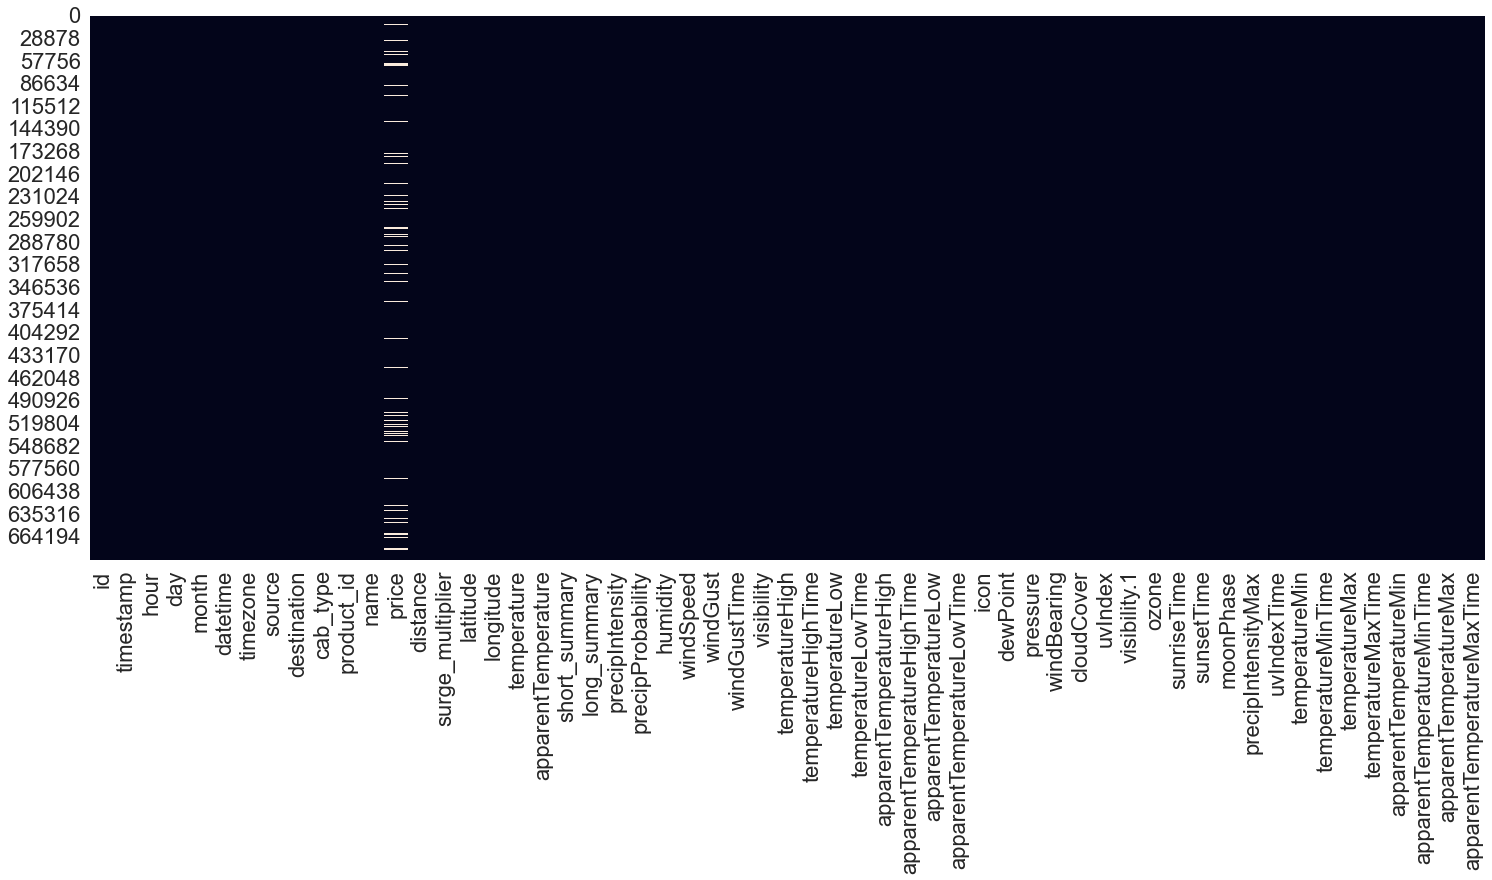

In [ ]:
plt.figure(figsize=(25, 10))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [ ]:
# drop missing values
df = df[df['price'].isnull()==False]

In [ ]:
# check total missing values after droping
df.isnull().sum().sum()

0

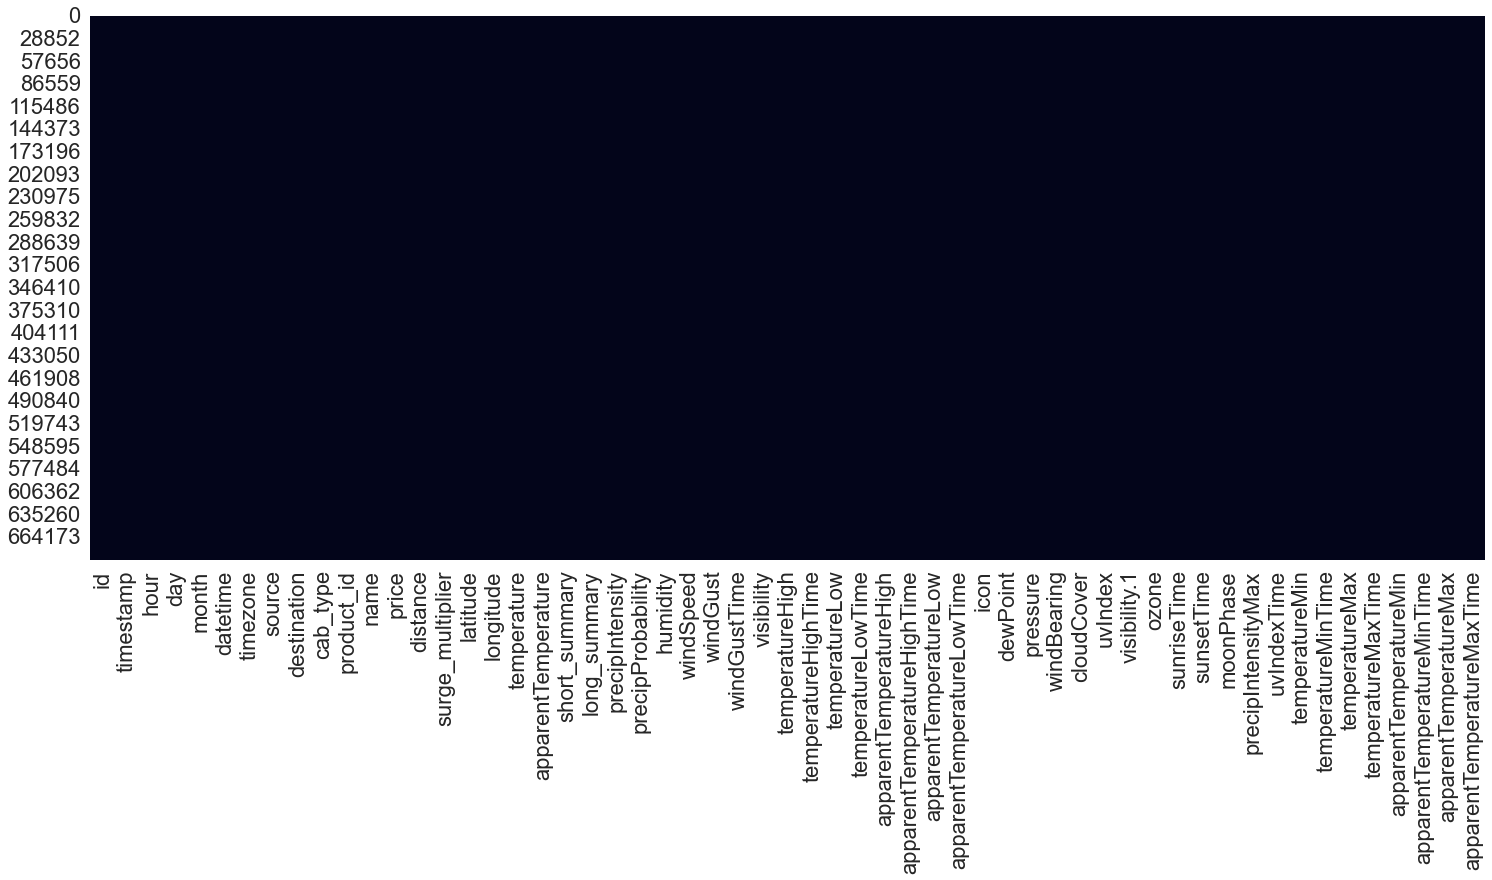

In [ ]:
plt.figure(figsize=(25, 10))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [ ]:
# check column visibility
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [ ]:
# check column visibility.1
df['visibility.1'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

In [ ]:
# drop column visibility.1
df = df.drop(['visibility.1'],axis=1)

# **EDA**
---

## 1. Analisis Waktu

### [Data Month]

Kita akan membuat fungsi grouping berdasarkan kolom yang ada di dataframe. Kemudian kita visualisasikan dengan banyaknya data tersebut muncul

In [ ]:
def plot_bar(groupby_column):
    df1 = df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame = df1,
                  x = groupby_column,
                  y = "counts",
                  color = groupby_column,
                  barmode = "group")
    print(df1)
    fig1.show()

Dengan menggunakan fungsi plot_bar(groupby_column), kita akan mengetahui bulan apa saja yang ada dalam data month.

In [ ]:
plot_bar('month')

   month  counts
0     11  263771
1     12  374205


Berdasarkan grafik diatas kita hanya memiliki fitur November dan Desember pada data Month. Itu berarti data ini diambil atau direkam pada bulan November dan Desember saja.

### [Data Day]

Jika kita ingin mengetahui jumlah taksi yang beroperasi pada hari-hari tertentu.

Sekali lagi, kita gunakan fungsi plot_bar(groupby_column)

In [ ]:
plot_bar('day')

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


Berdasarkan grafik diatas terlihat bahwa kita memiliki banyak jarak pada data Day. Itu berarti kita tidak memiliki data di hari-hari tertentu di setiap bulannya. Dengan kata lain, semua taksi sedang tidak beroperasi di hari-hari tersebut. Taksi yang beroperasi paling tinggi ada di antara hari ke-25 dan hari ke-30.

### [Data Hour]

Setelah kita mengetahui berapa jumlah taksi yang beroperasi di hari-hari tertentu, kita akan mencari tahu berapa lama durasi taksi-taksi tersebut beroperasi.

Gunakan fungsi plot_bar(groupby_column)

In [ ]:
plot_bar('hour')

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


Berdasarkan grafik di atas terlihat bahwa kita memiliki hampir 24 jam data rekaman. Dengan kata lain, durasi taksi beroperasi paling lama hampir mencapai 24 jam.

## 2. Analisis Titik Keberangkatan dan Titik Tujuan Penumpang

Selanjutnya kita akan mencari tahu dimana saja titik keberangkatan taksi dengan menggunakan fungsi plot_bar(groupby_column)

In [ ]:
plot_bar('source')

                     source  counts
0                  Back Bay   53201
1               Beacon Hill   52841
2         Boston University   53172
3                    Fenway   53166
4        Financial District   54197
5          Haymarket Square   53147
6                 North End   53171
7             North Station   52576
8   Northeastern University   53164
9             South Station   53160
10         Theatre District   53201
11                 West End   52980


Berdasarkan grafik di atas semua jumlah masing-masing fitur source memiliki jumlah yang hampir sama. Ada sekitar 50.000 data pada setiap fitur source.

Sekarang kita akan mengelompokkan data destination dengan plot_bar()

In [ ]:
plot_bar('destination')

                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52840
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53189
11                 West End   52992


Sama seperti sebelumnya, ada sekitar 50.000 data pada setiap fitur destination.

Berbeda dengan pengelompokkan sebelumnya, sekarang kita akan mengelompokkan data destination dan source berdasarkan latitude dan longitude

In [ ]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination             source                                       
Back Bay                Boston University        42.336960 -71.066178
                        Fenway                   42.337740 -71.065822
                        Haymarket Square         42.337087 -71.065110
                        North End                42.338100 -71.066343
                        Northeastern University  42.336668 -71.065314
                        South Station            42.338897 -71.065908
Beacon Hill             Boston University        42.336917 -71.065885
                        Fenway                   42.338990 -71.065719
                        Haymarket Square         42.337413 -71.066059
                        North End                42.338418 -71.065809
                        Northeastern University  42.337268 -71.066061
                        South Station            42.336316 -71.065699
Boston University       Back Bay                 42.337217 -71.065947
                        Beacon Hill              42.339364 -71.066517
                        Financial District       42.339361 -71.066465
                        North Station            42.338372 -71.066191
                        Theatre District         42.338152 -71.066276
                        West End                 42.337556 -71.066265
Fenway                  Back Bay                 42.340103 -71.065819
                        Beacon Hill              42.337595 -71.065471
                        Financial District       42.337147 -71.066254
                        North Station            42.339660 -71.066504
                        Theatre District         42.336378 -71.065388
                        West End                 42.338521 -71.066339
Financial District      Boston University        42.338733 -71.066581
                        Fenway                   42.337034 -71.066028
                        Haymarket Square         42.337781 -71.065863
                        North End                42.338338 -71.065965
                        Northeastern University  42.338523 -71.065964
                        South Station            42.338989 -71.067037
Haymarket Square        Back Bay                 42.339877 -71.066475
                        Beacon Hill              42.337246 -71.065966
                        Financial District       42.337398 -71.066237
                        North Station            42.338276 -71.066073
                        Theatre District         42.338175 -71.065699
                        West End                 42.339109 -71.066251
North End               Back Bay                 42.338516 -71.066170
                        Beacon Hill              42.336792 -71.066216
                        Financial District       42.337654 -71.066158
                        North Station            42.339309 -71.066936
                        Theatre District         42.338578 -71.066639
                        West End                 42.338614 -71.065878
North Station           Boston University        42.338786 -71.066362
                        Fenway                   42.338450 -71.066614
                        Haymarket Square         42.337260 -71.066279
                        North End                42.337672 -71.065832
                        Northeastern University  42.337793 -71.066491
                        South Station            42.336529 -71.065432
Northeastern University Back Bay                 42.338917 -71.066289
                        Beacon Hill              42.339002 -71.065600
                        Financial District       42.337789 -71.066015
                        North Station            42.339770 -71.066493
                        Theatre District         42.338356 -71.065319
                        West End                 42.336812 -71.066274
South Station           Back Bay                 42.338567 -71.065891
                        Beacon Hill              42.338714 -

Kita akan membuat peta geospasial untuk memvisualisasi data yang titik keberangkatan di Haymarket Square. Kita akan memplot menggunakan cluster bukan marker. Peta yang dirender oleh folium bersifat interaktif, kita dapat menggeser, menarik, dan memperbesar/memperkecil.

In [ ]:
# import pustaka yang dibutuhkan untuk membuat peta geospasial
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster

# memfilter titik keberangkatan Haymarket Square
df1 = df[df['source']=='Haymarket Square']

# membuat folium map dengan zoom 10
my_map = folium.Map(location=[df1["latitude"].mean(),
                              df1["longitude"].mean()],
                    zoom_start = 10)

# membuat cluster berdasarkan latitude dan longitude
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),
                                   color='green'))
my_map

Berdasarkan peta geospasial di atas kita dapat melihat bahwa perjalanan dengan titik keberangkatan Haymarket Square memiliki dua cluster tujuan yang berisi banyak tempat. Untuk melihatnya kita bisa memperbesar peta. Sebagian besar berada di area Boston sebanyak 46256 data pada cluster tersebut.

## 3. Analisis 2 Jasa Layanan Transportasi Uber dan Lyft

Selanjutnya kita akan mencari tahu 2 layanan transportasi yaitu uber dan lyft.

Kita akan gunakan fungsi plot_bar(groupby_column)

In [ ]:
plot_bar('cab_type')

  cab_type  counts
0     Lyft  307408
1     Uber  330568


Berdasarkan grafik diatas kita memiliki data uber lebih banyak daripada data lyft. Perbedaannya tidak terlalu besar, masing-masing tipe taksi memiliki sekitar 300.000 data.

In [ ]:
df.groupby(by=["cab_type", "name"]).size().reset_index(name="counts")

cab_type          name  counts
0      Lyft           Lux   51235
1      Lyft     Lux Black   51235
2      Lyft  Lux Black XL   51235
3      Lyft          Lyft   51235
4      Lyft       Lyft XL   51235
5      Lyft        Shared   51233
6      Uber         Black   55095
7      Uber     Black SUV   55096
8      Uber      UberPool   55091
9      Uber         UberX   55094
10     Uber        UberXL   55096
11     Uber           WAV   55096

Kita akan mencari tahu jasa layanan transportasi yang beroperasi setiap harinya

In [ ]:
# grouping berdasarkan day dan cab_type
df2 =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")

# tampilkan df2 dalam bentuk barplot
fig2 = px.bar(data_frame=df2,
              x="day",
              y="counts",
              color="cab_type",
              barmode="group")
fig2.show()

Berdasarkan grafik di atas kedua jasa layanan transportasi paling tinggi beroperasi di antara hari ke-25 sampai hari ke-30

Mari kita mencari tahu berapa lama durasi kedua jasa layanan transportasi tersebut beroperasi dalam 1 hari

In [ ]:

df3 = df.groupby(["hour","cab_type"]).size().reset_index(name="counts")


fig3 = px.bar(data_frame = df3,
              x = "hour",
              y = "counts",
              color = "cab_type",
              barmode = "group")
fig3.show()

Dapat disimpulkan bahwa uber adalah jasa layanan transportasi yang sering dipesan dibandingkan dengan lyft. Berdasarkan grafik-grafik diatas taksi uber lebih sering beroperasi setiap hari dan setiap jamnya.

## 4. Analisis Tarif Jasa Layanan Transportasi

Kita dapat melihat rata-rata dari data harga di setiap rute (keberangkatan-tujuan) melalui tabel berikut

In [ ]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

Kita juga bisa melihat harga maksimum dari data harga

In [ ]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


id     timestamp  hour  day  month  \
597071  ba1593a1-e4fd-4c7a-a011-e2d4fccbf081  1.543714e+09     1    2     12   

                   datetime          timezone              source destination  \
597071  2018-12-02 01:28:02  America/New_York  Financial District      Fenway   

       cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
597071     Lyft  ...                0.0  1543683600           31.57   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
597071          1543665600           44.65          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
597071                    28.1                  1543658400   

        apparentTemperatureMax apparentTemperatureMaxTime  
597071                   43.98                 1543690800  

[1 rows x 56 columns]

In [ ]:
df[df['price']==df.price.max()][['latitude','longitude']]

latitude  longitude
597071   42.3503    -71.081

Kita mendapatkan tarif taksi tertinggi sebanyak 97.5 dolar dari titik keberangkatan di Financial District menuju ke Fenway. Untuk mengetahui seberapa jauh rute ini, kita akan memplot peta dari kedua tempat tersebut menggunakan folium.

In [ ]:
# membuat peta folium
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)

# buat marker titik tujuan
folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway

# buat marker titik keberangkatan
folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
display(map1)

Sepertinya jarak diantara kedua tempat tersebut tidak terlalu jauh. Dengan kata lain, kedua tempat tersebut masih dalam wilayah Boston bukan di luar Boston. Jadi kemungkinannya ada outlier karena kita tidak memiliki informasi mengenai durasi perjalanan rute tersebut. Oleh karena itu, kita harus mengecek data lainnya dengan rute yang sama.

In [ ]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()

df_group[(df_group['source']=='Financial District')& (df_group['destination']=='Fenway')]

source destination      mean
25  Financial District      Fenway  23.40485

Rata-rata dari data harga rute tersebut adalah 23.4 dolar yang mana jauh dari data harga maksimum yaitu 97.5 dolar. Maka kemungkinan itu adalah outlier. Kita akan menghapusnya

In [ ]:
# filtering harga yang bukan harga maksimum
df = df.loc[df['price']!=df.price.max()]

In [ ]:
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 56 columns]

## 5. Analisis Numeric & Categorical Values

In [ ]:
df2 = pd.DataFrame(df_raw)

In [ ]:
df2 = df2.drop(['id'],axis=1)
df2 = df2.drop(['timestamp','datetime','windGustTime','temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime',
                'apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime',
                'sunriseTime','sunsetTime','precipIntensityMax','uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax',
                'temperatureMaxTime','apparentTemperature','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax',
                'apparentTemperatureMaxTime','long_summary','icon','product_id','timezone','visibility.1','destination'],axis=1)

In [ ]:
df2.describe()

hour            day          month          price  \
count  693071.000000  693071.000000  693071.000000  637976.000000   
mean       11.619137      17.794365      11.586684      16.545125   
std         6.948114       9.982286       0.492429       9.324359   
min         0.000000       1.000000      11.000000       2.500000   
25%         6.000000      13.000000      11.000000       9.000000   
50%        12.000000      17.000000      12.000000      13.500000   
75%        18.000000      28.000000      12.000000      22.500000   
max        23.000000      30.000000      12.000000      97.500000   

            distance  surge_multiplier       latitude      longitude  \
count  693071.000000     693071.000000  693071.000000  693071.000000   
mean        2.189430          1.013870      42.338172     -71.066151   
std         1.138937          0.091641       0.047840       0.020302   
min         0.020000          1.000000      42.214800     -71.105400   
25%         1.280000          1.000000      42.350300     -71.081000   
50%         2.160000          1.000000      42.351900     -71.063100   
75%         2.920000          1.000000      42.364700     -71.054200   
max         7.860000          3.000000      42.366100     -71.033000   

         temperature  precipIntensity  ...      windSpeed       windGust  \
count  693071.000000    693071.000000  ...  693071.000000  693071.000000   
mean       39.584388         0.008922  ...       6.186253       8.469860   
std         6.726084         0.026901  ...       3.148223       5.289179   
min        18.910000         0.000000  ...       0.450000       0.800000   
25%        36.450000         0.000000  ...       3.410000       4.060000   
50%        40.490000         0.000000  ...       5.910000       7.550000   
75%        43.580000         0.000000  ...       8.410000      11.740000   
max        57.220000         0.144700  ...      15.000000      27.250000   

          visibility       dewPoint       pressure    windBearing  \
count  693071.000000  693071.000000  693071.000000  693071.000000   
mean        8.467970      31.656256    1010.094766     220.055853   
std         2.602888       9.142355      13.472899      99.102736   
min         0.717000       4.390000     988.090000       2.000000   
25%         8.432000      27.490000     999.820000     124.000000   
50%         9.880000      30.690000    1009.250000     258.000000   
75%         9.996000      38.120000    1021.860000     303.000000   
max        10.000000      50.670000    1035.550000     356.000000   

          cloudCover        uvIndex          ozone      moonPhase  
count  693071.000000  693071.000000  693071.000000  693071.000000  
mean        0.686502       0.248908     313.513635       0.579066  
std         0.358534       0.474097      27.953061       0.244705  
min         0.000000       0.000000     269.400000       0.090000  
25%         0.370000       0.000000     290.900000       0.300000  
50%         0.820000       0.000000     307.400000       0.680000  
75%         1.000000       0.000000     331.800000       0.790000  
max         1.000000       2.000000     378.900000       0.930000  

[8 rows x 22 columns]

In [ ]:
df2.describe(include='object')

source cab_type    name short_summary
count               693071   693071  693071        693071
unique                  12        2      13             9
top     Financial District     Uber  UberXL     Overcast 
freq                 58857   385663   55096        218895

In [ ]:
num_col = df2.select_dtypes(include='number')
num_col.head()

hour  day  month  price  distance  surge_multiplier  latitude  longitude  \
0     9   16     12    5.0      0.44               1.0   42.2148    -71.033   
1     2   27     11   11.0      0.44               1.0   42.2148    -71.033   
2     1   28     11    7.0      0.44               1.0   42.2148    -71.033   
3     4   30     11   26.0      0.44               1.0   42.2148    -71.033   
4     3   29     11    9.0      0.44               1.0   42.2148    -71.033   

   temperature  precipIntensity  ...  windSpeed  windGust  visibility  \
0        42.34           0.0000  ...       8.66      9.17      10.000   
1        43.58           0.1299  ...      11.98     11.98       4.786   
2        38.33           0.0000  ...       7.33      7.33      10.000   
3        34.38           0.0000  ...       5.28      5.28      10.000   
4        37.44           0.0000  ...       9.14      9.14      10.000   

   dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  moonPhase  
0     32.70   1021.98           57        0.72        0  303.8       0.30  
1     41.83   1003.97           90        1.00        0  291.1       0.64  
2     31.10    992.28          240        0.03        0  315.7       0.68  
3     26.64   1013.73          310        0.00        0  291.1       0.75  
4     28.61    998.36          303        0.44        0  347.7       0.72  

[5 rows x 22 columns]

In [ ]:
num_col.shape

(693071, 22)

In [ ]:
cat_col = df2.select_dtypes(include='object')
cat_col.head()

source cab_type          name    short_summary
0  Haymarket Square     Lyft        Shared   Mostly Cloudy 
1  Haymarket Square     Lyft           Lux            Rain 
2  Haymarket Square     Lyft          Lyft           Clear 
3  Haymarket Square     Lyft  Lux Black XL           Clear 
4  Haymarket Square     Lyft       Lyft XL   Partly Cloudy

In [ ]:
cat_col.shape

(693071, 4)

<ipython-input-123-eee71bf657b3>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-123-eee71bf657b3>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-123-eee71bf657b3>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

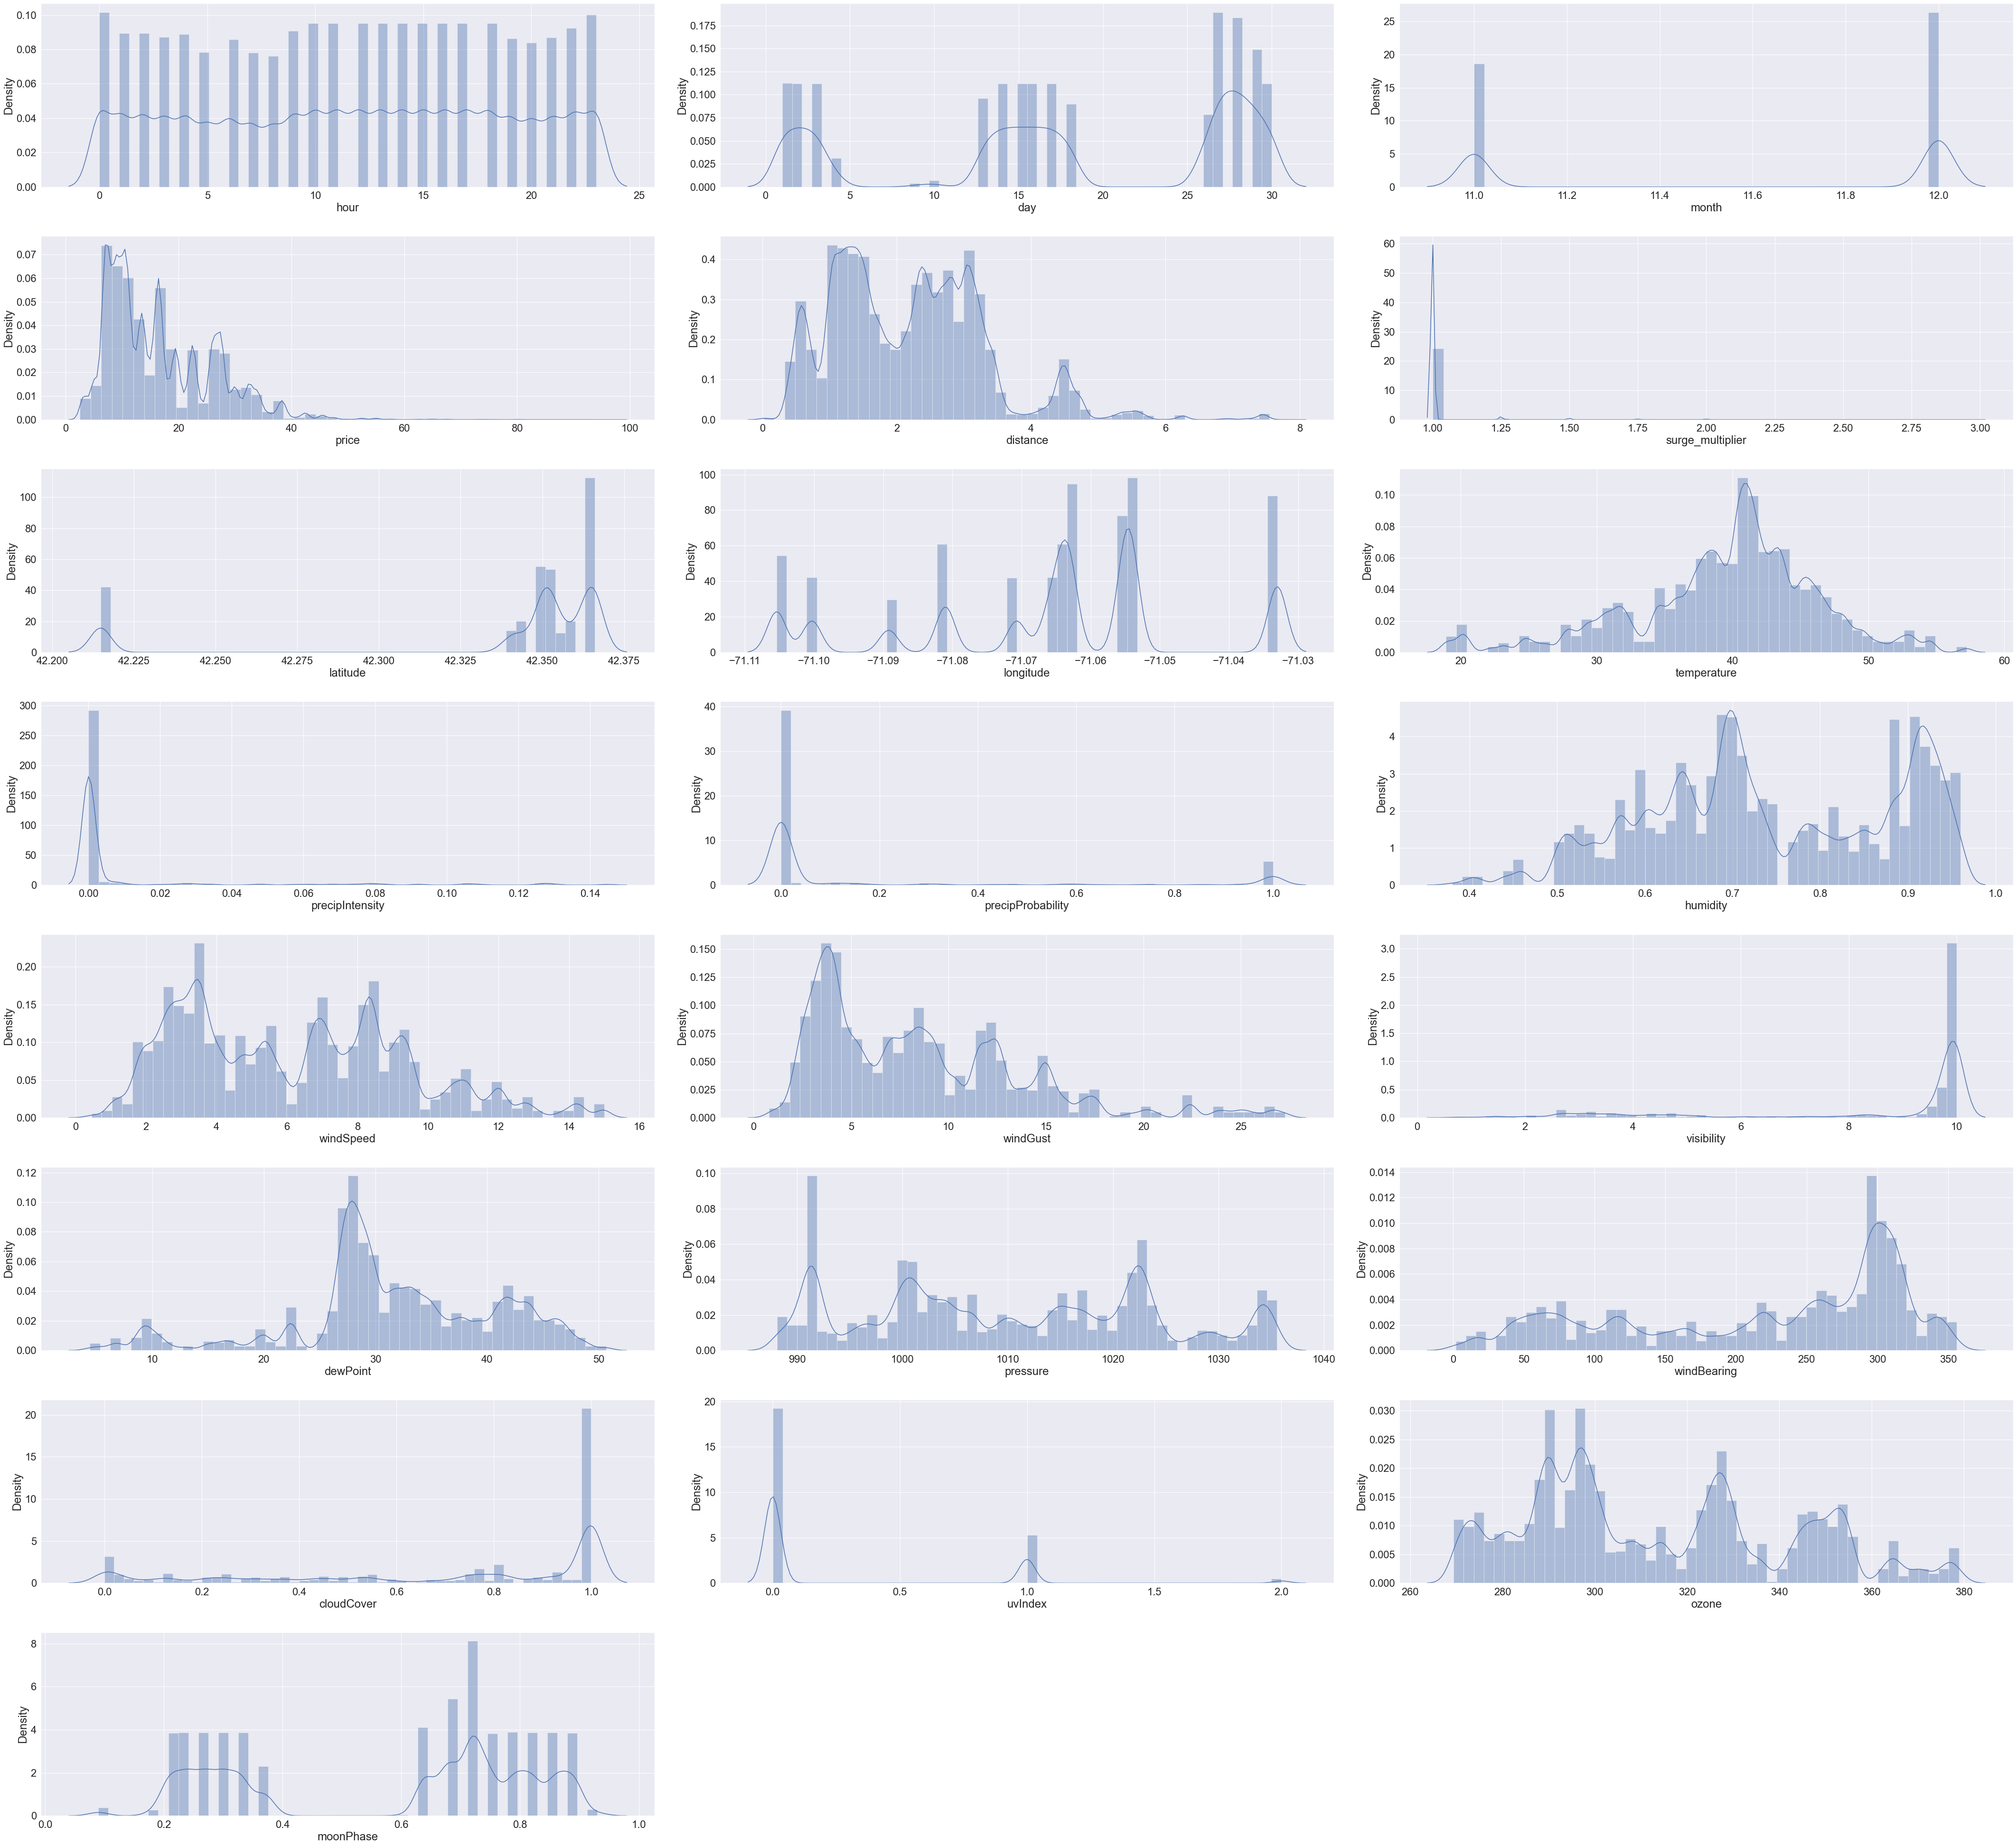

In [ ]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in num_col:
    plt.subplot(8,3,j)
    sns.distplot(num_col[column])
    plt.tight_layout()
    j=j+1

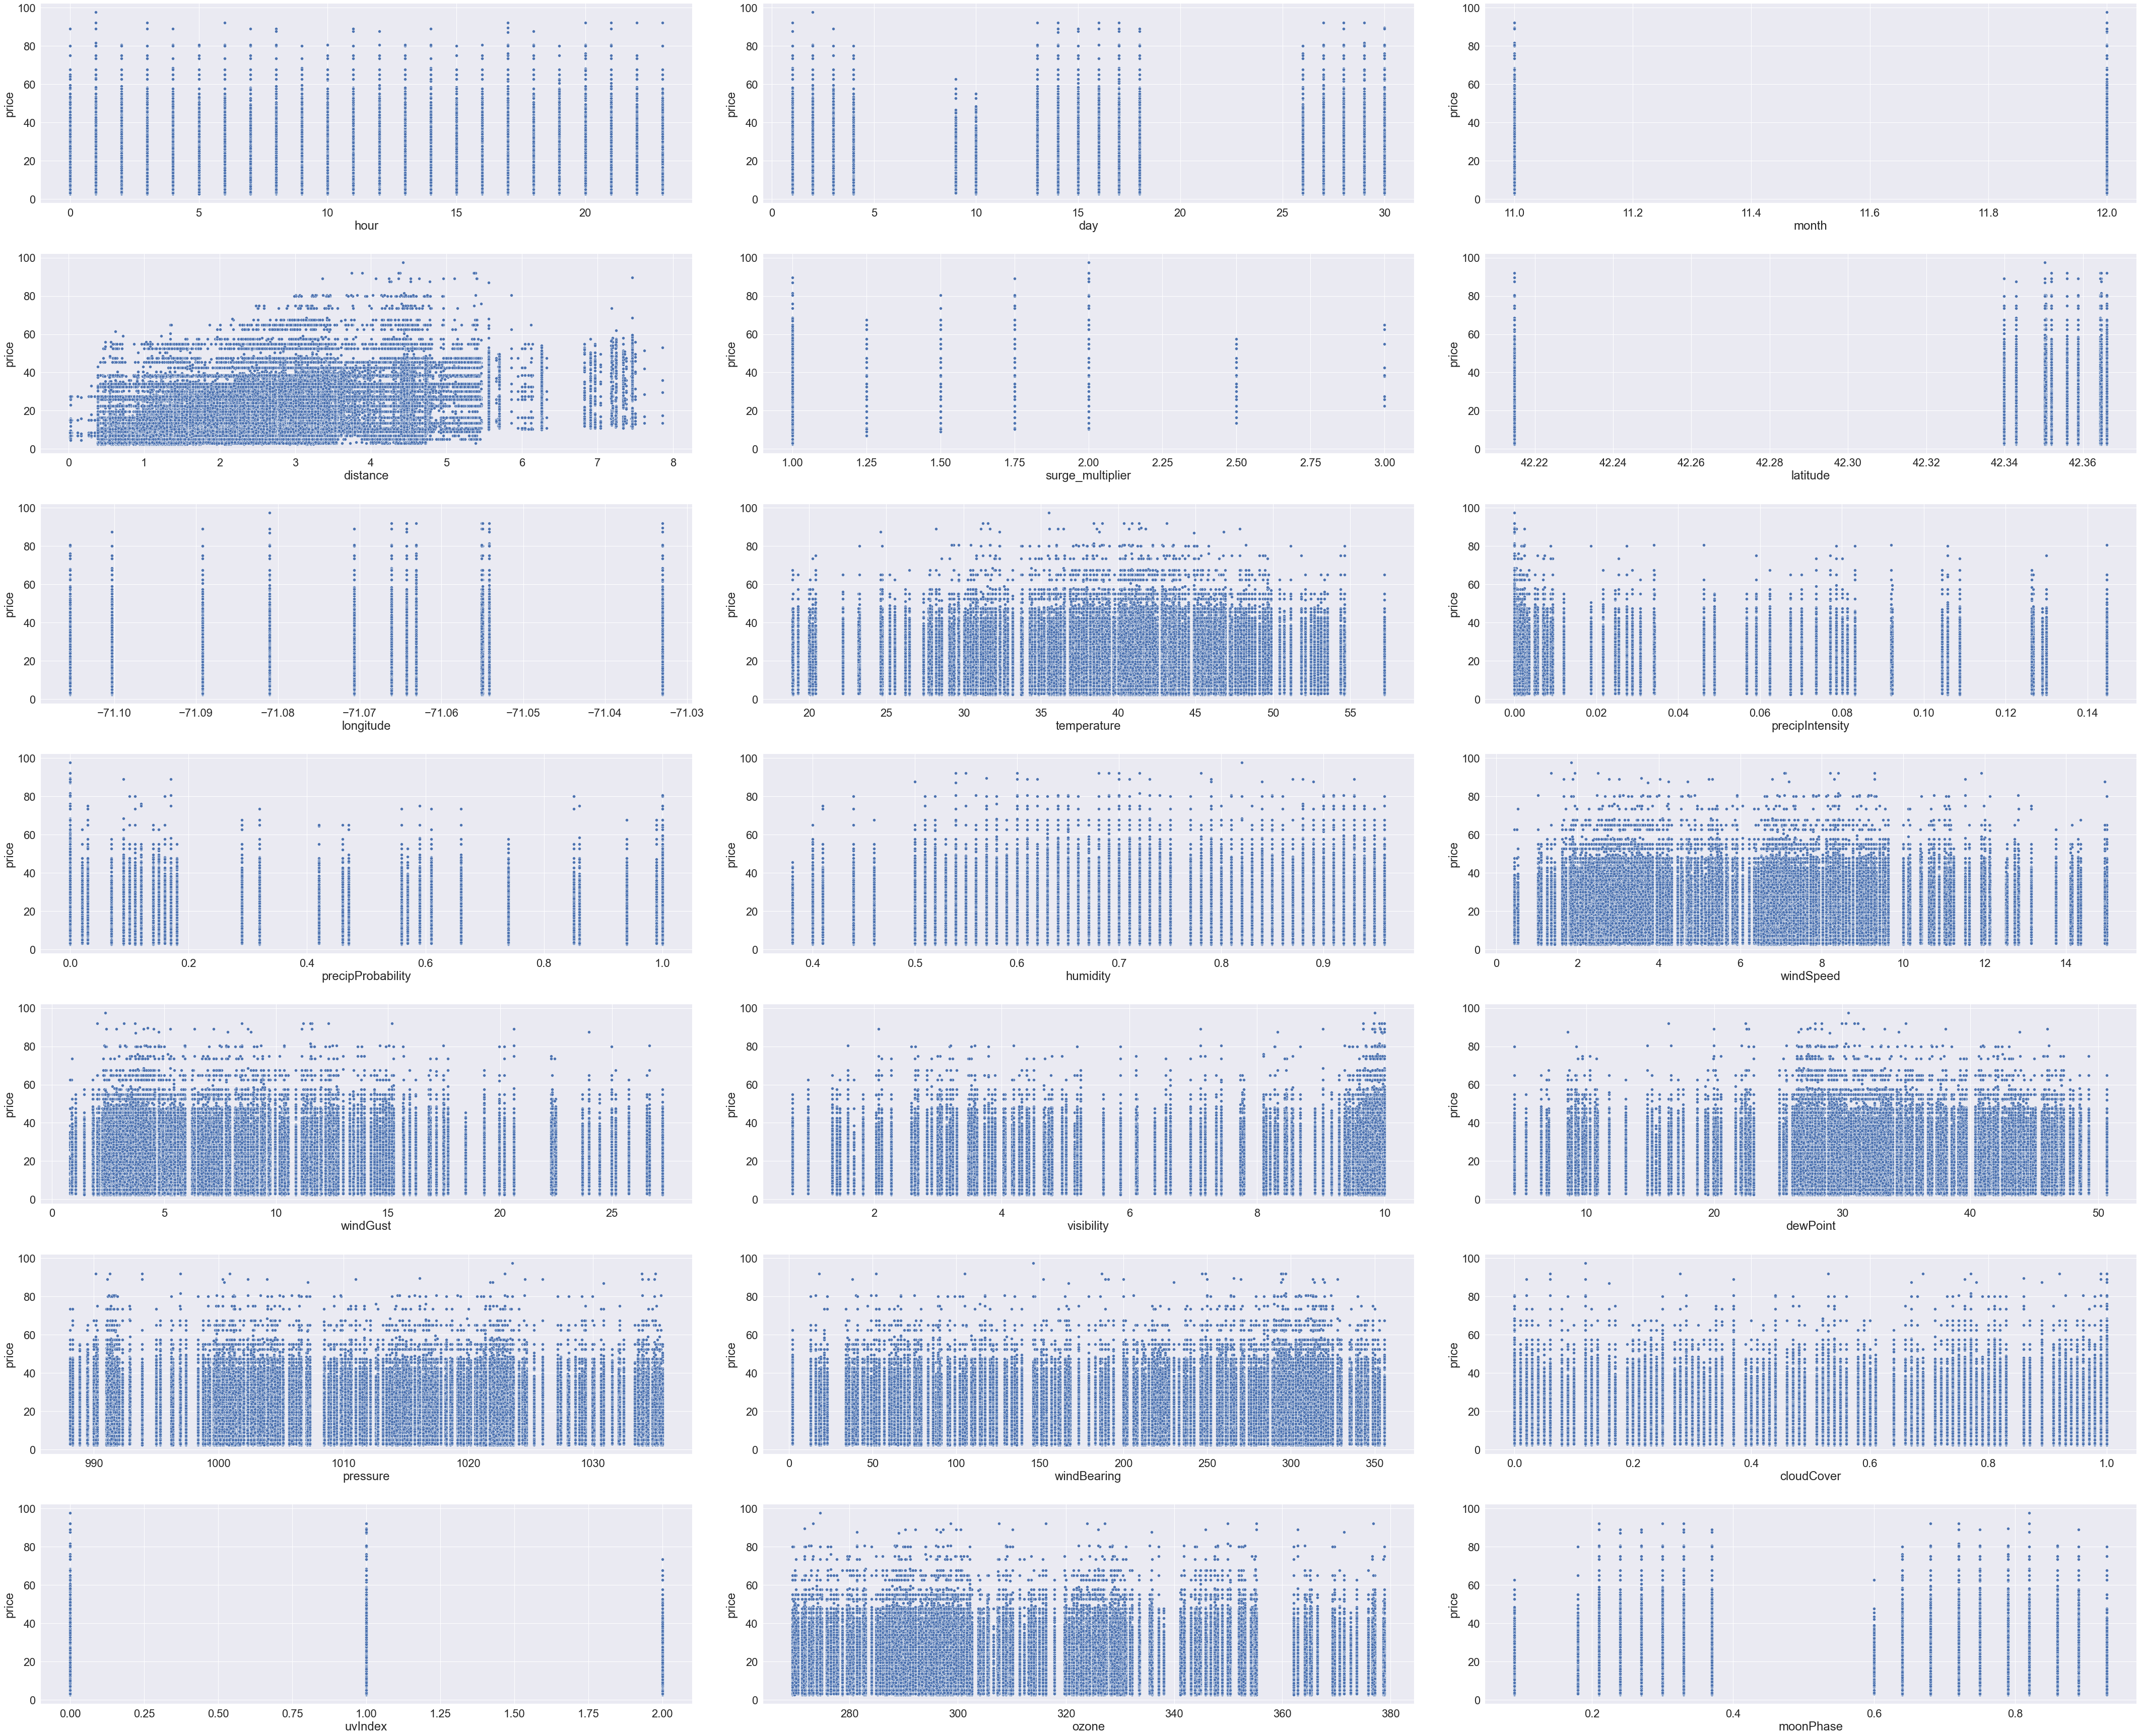

In [ ]:
plt.figure(figsize = (60,55))
plt.rcParams.update({'font.size': 40})
j = 1
for column in num_col:
    if column == 'price':
        continue
    else:
        plt.subplot(8,3,j)
        sns.scatterplot(x = num_col[column],y = num_col['price'])
        plt.tight_layout()
        j = j + 1

In [ ]:
cat_col1 = cat_col.copy()

In [ ]:
cat_col['price'] = df['price']

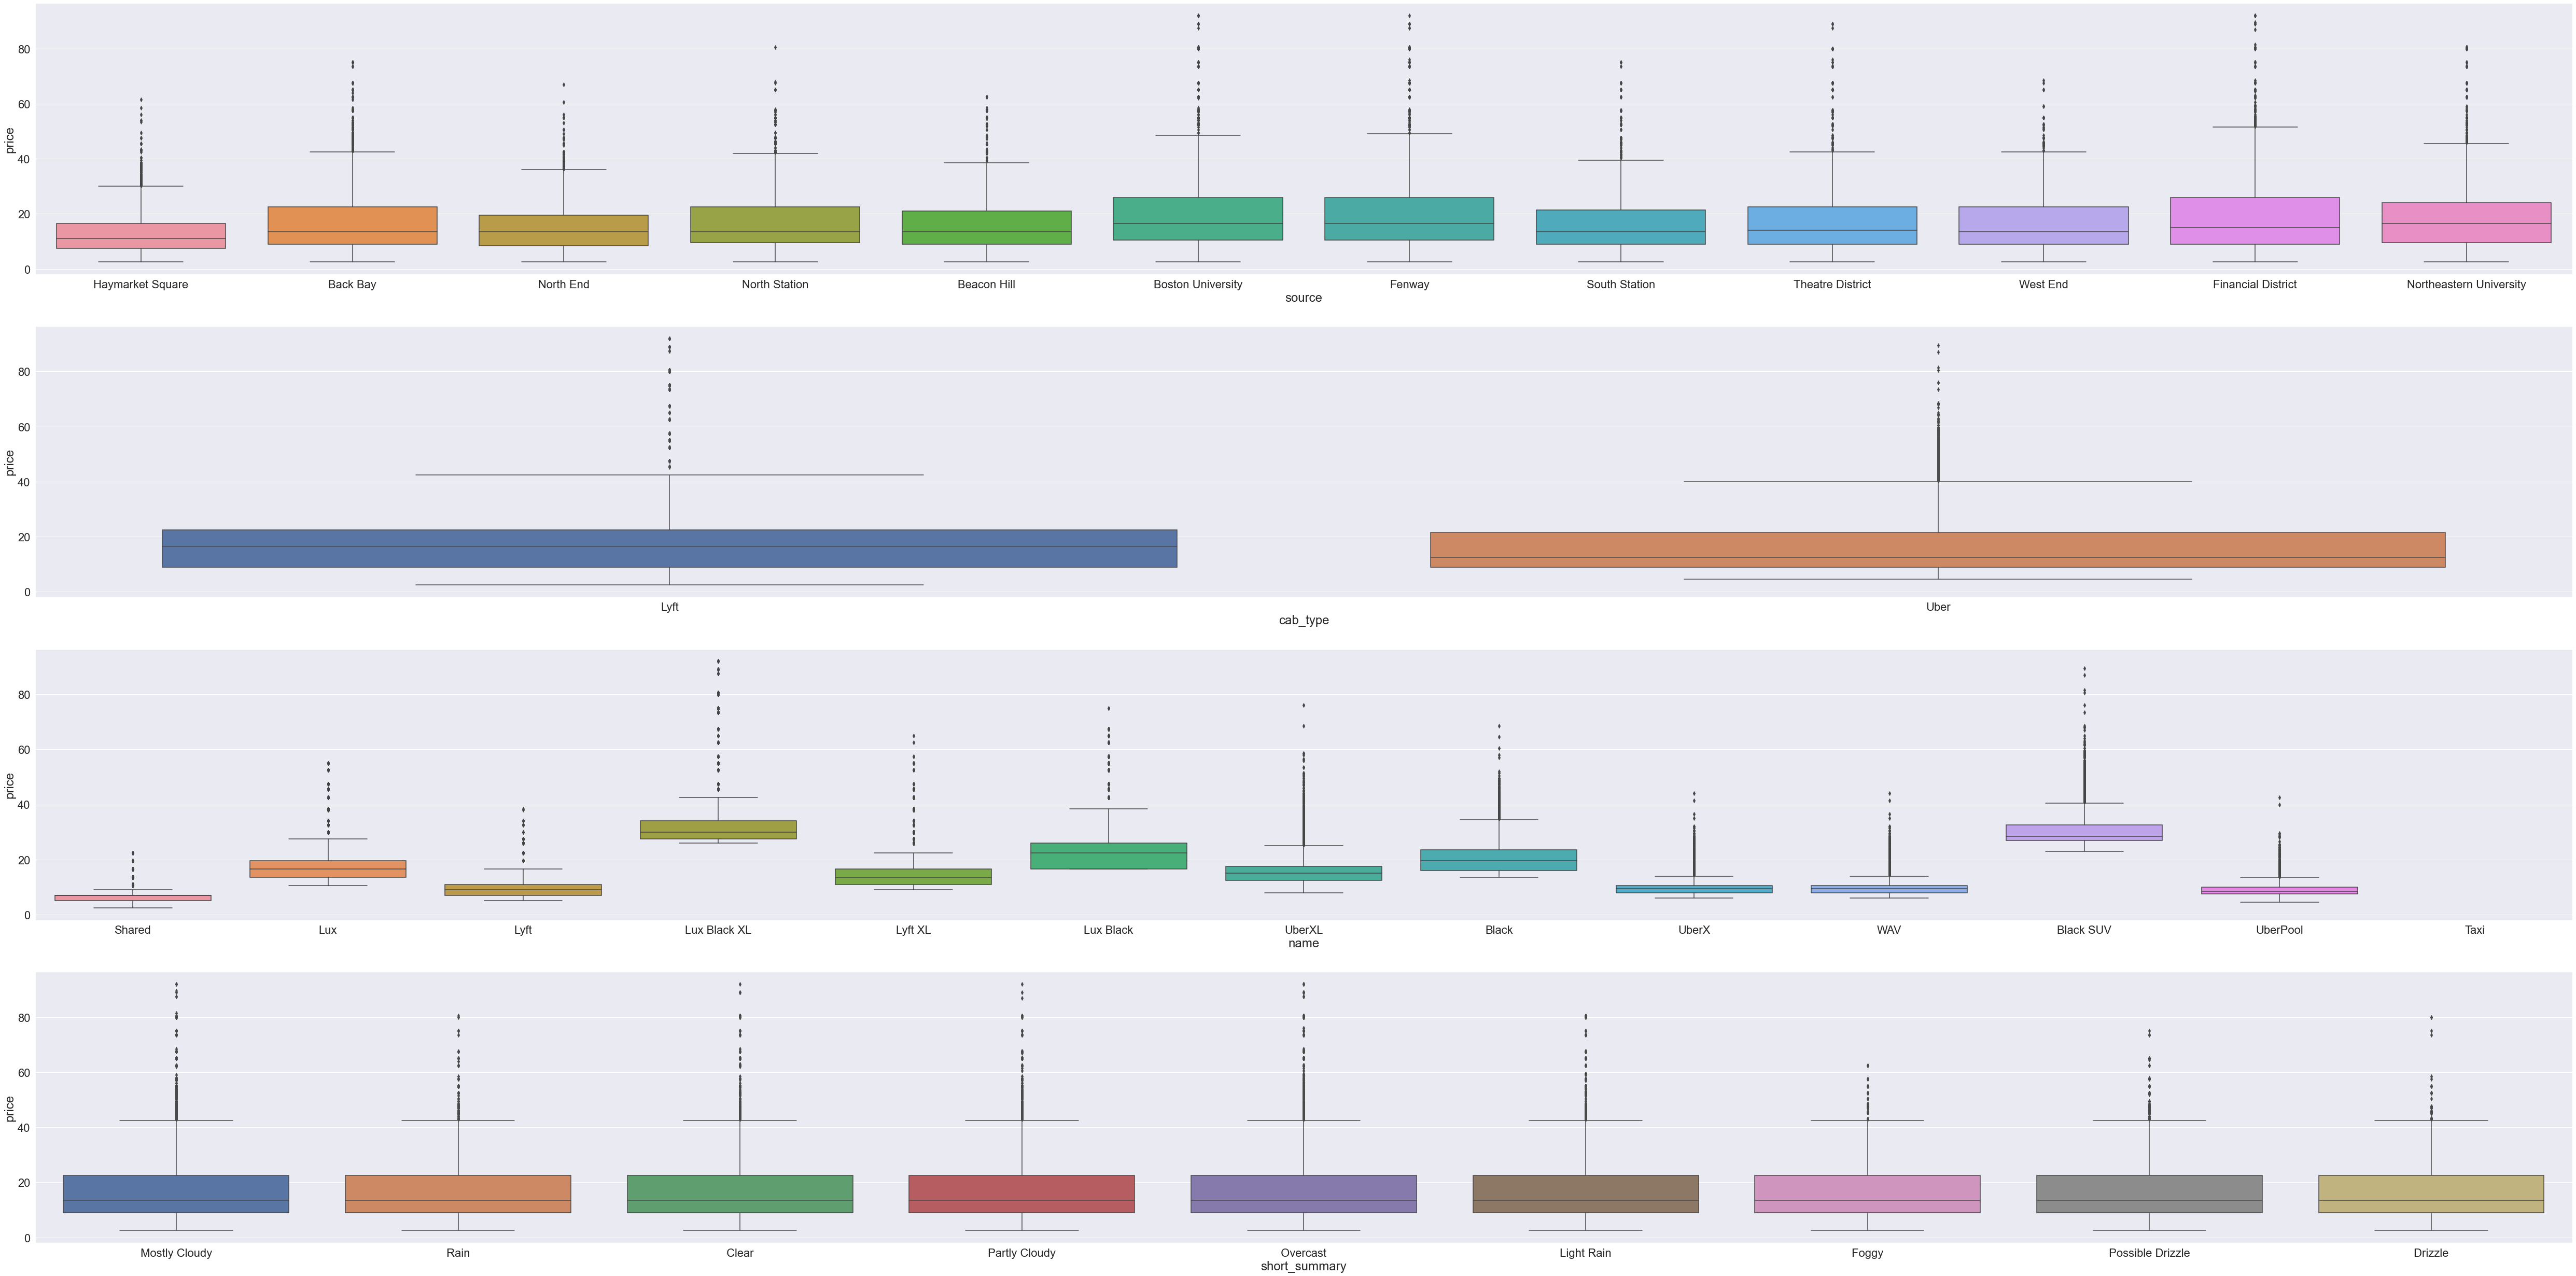

In [ ]:
plt.figure(figsize=(70,69))
plt.rcParams.update({'font.size': 40})
j=1
for column in cat_col:
    if column=='price':
        continue
    else:
        plt.subplot(8,1,j)
        sns.boxplot(x=cat_col[column],y=cat_col['price'])
        plt.tight_layout()
        j=j+1

In [ ]:
corr = num_col.corr()

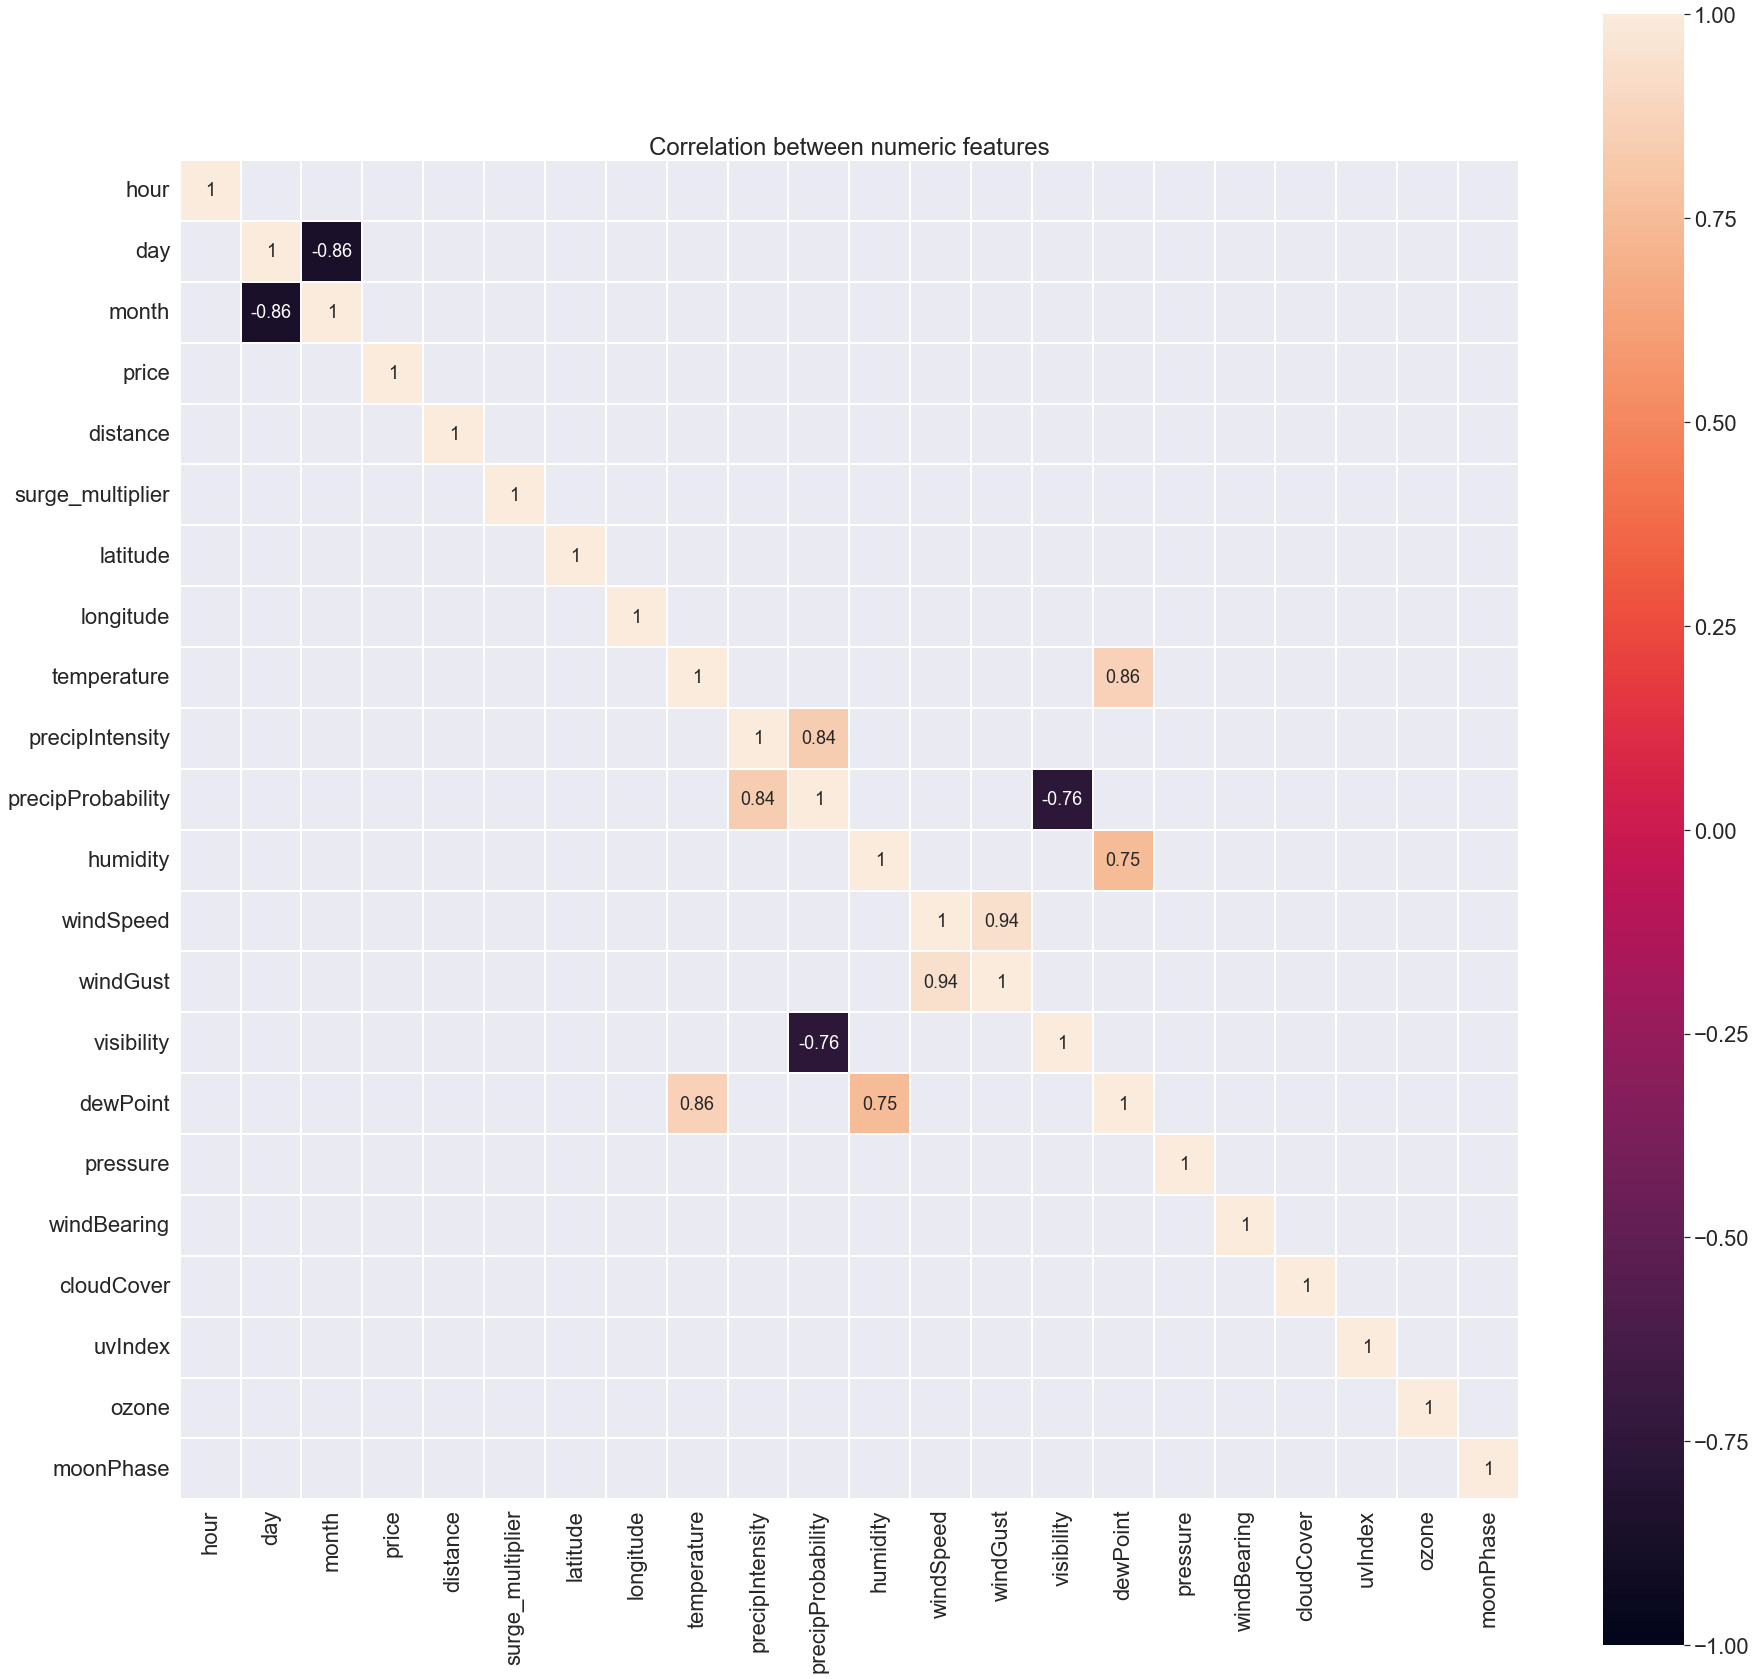

In [ ]:
# set figure size
plt.figure(figsize=(30, 30))

# set condition to get a strong correlation between the variables
sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size": 18}, square=True);

# specify name of the plot
plt.title('Correlation between numeric features')
plt.show()

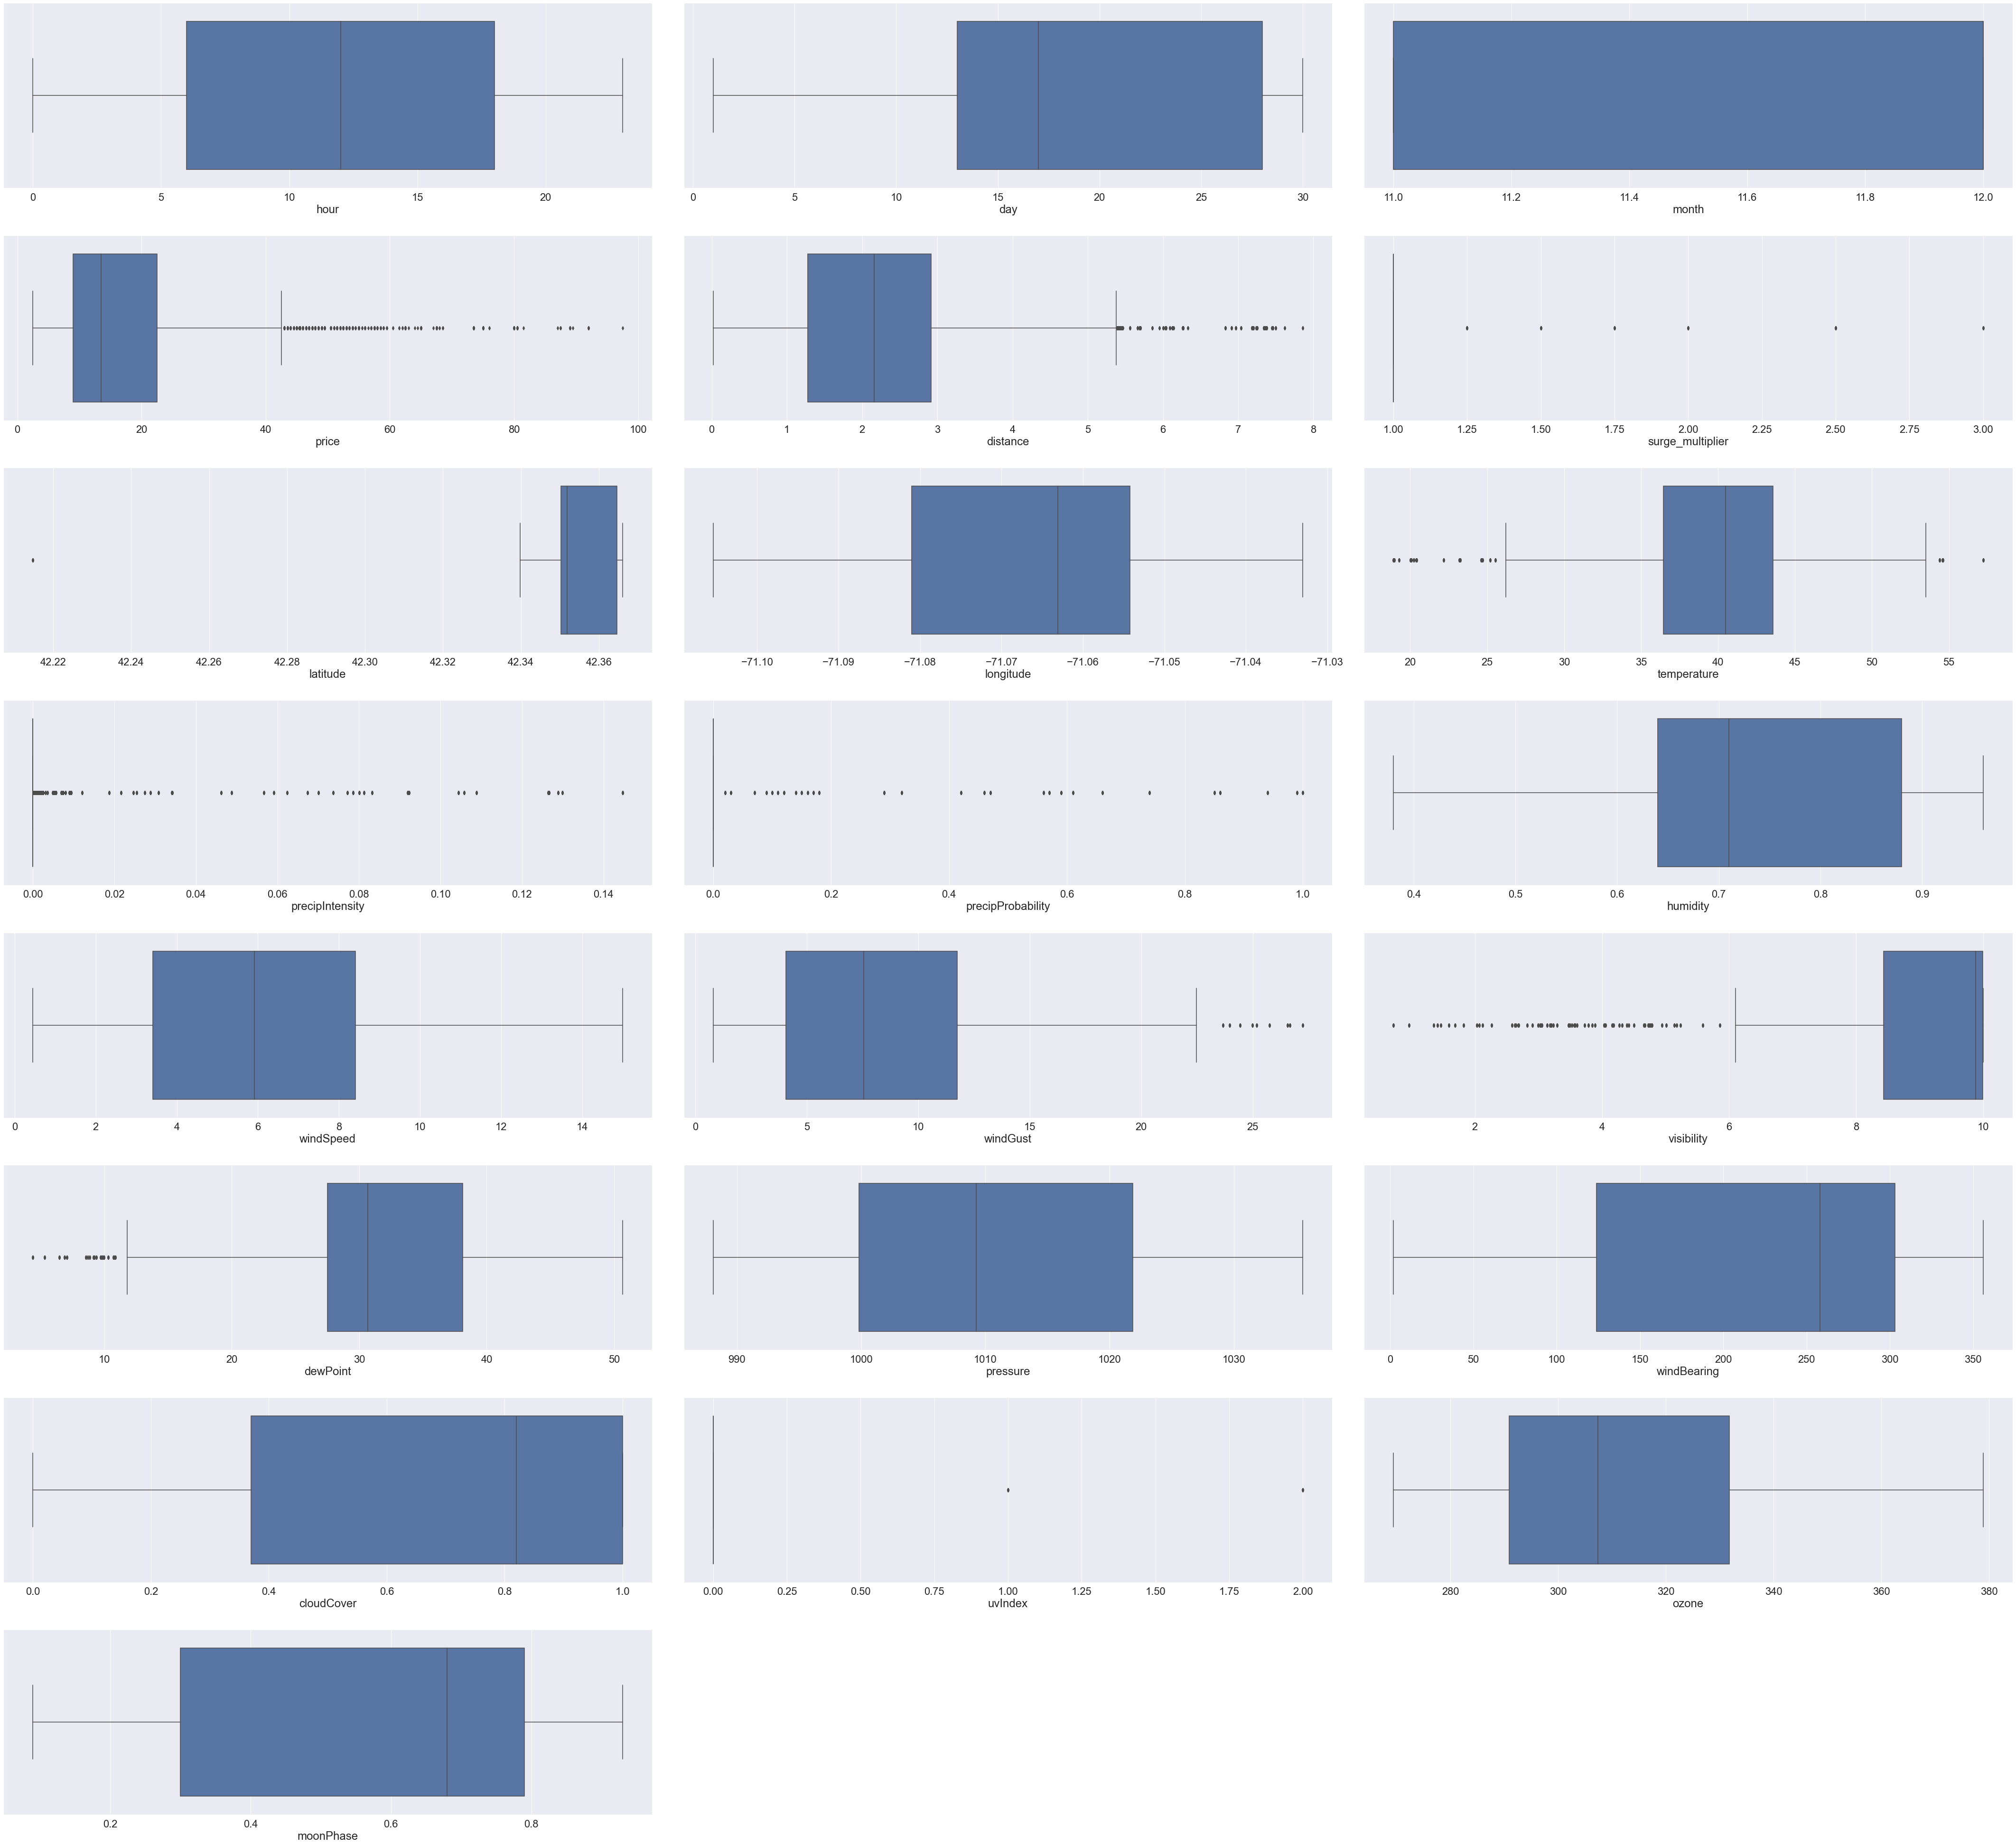

In [ ]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in num_col:
    plt.subplot(8,3,j)
    sns.boxplot(x=num_col[column])
    plt.tight_layout()
    j=j+1

In [ ]:
data2 = df2[['price','distance','latitude','temperature','windGust','visibility','dewPoint']]

In [ ]:
#Outlier Treatment
#Outlier Treatment
#Capping the outliers #Winsorization
for i in data2.columns:
    q1=data2[i].quantile(0.25)
    q3=data2[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=data2[i].quantile(0.99)
    lc=data2[i].quantile(0.01)
    for ind1 in data2[i].index:
        if data2.loc[ind1, i] >ub:            
            data2.loc[ind1, i] =uc
        if data2.loc[ind1, i] < lb:
            data2.loc[ind1, i] =lc

<ipython-input-132-c274e715e995>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-132-c274e715e995>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



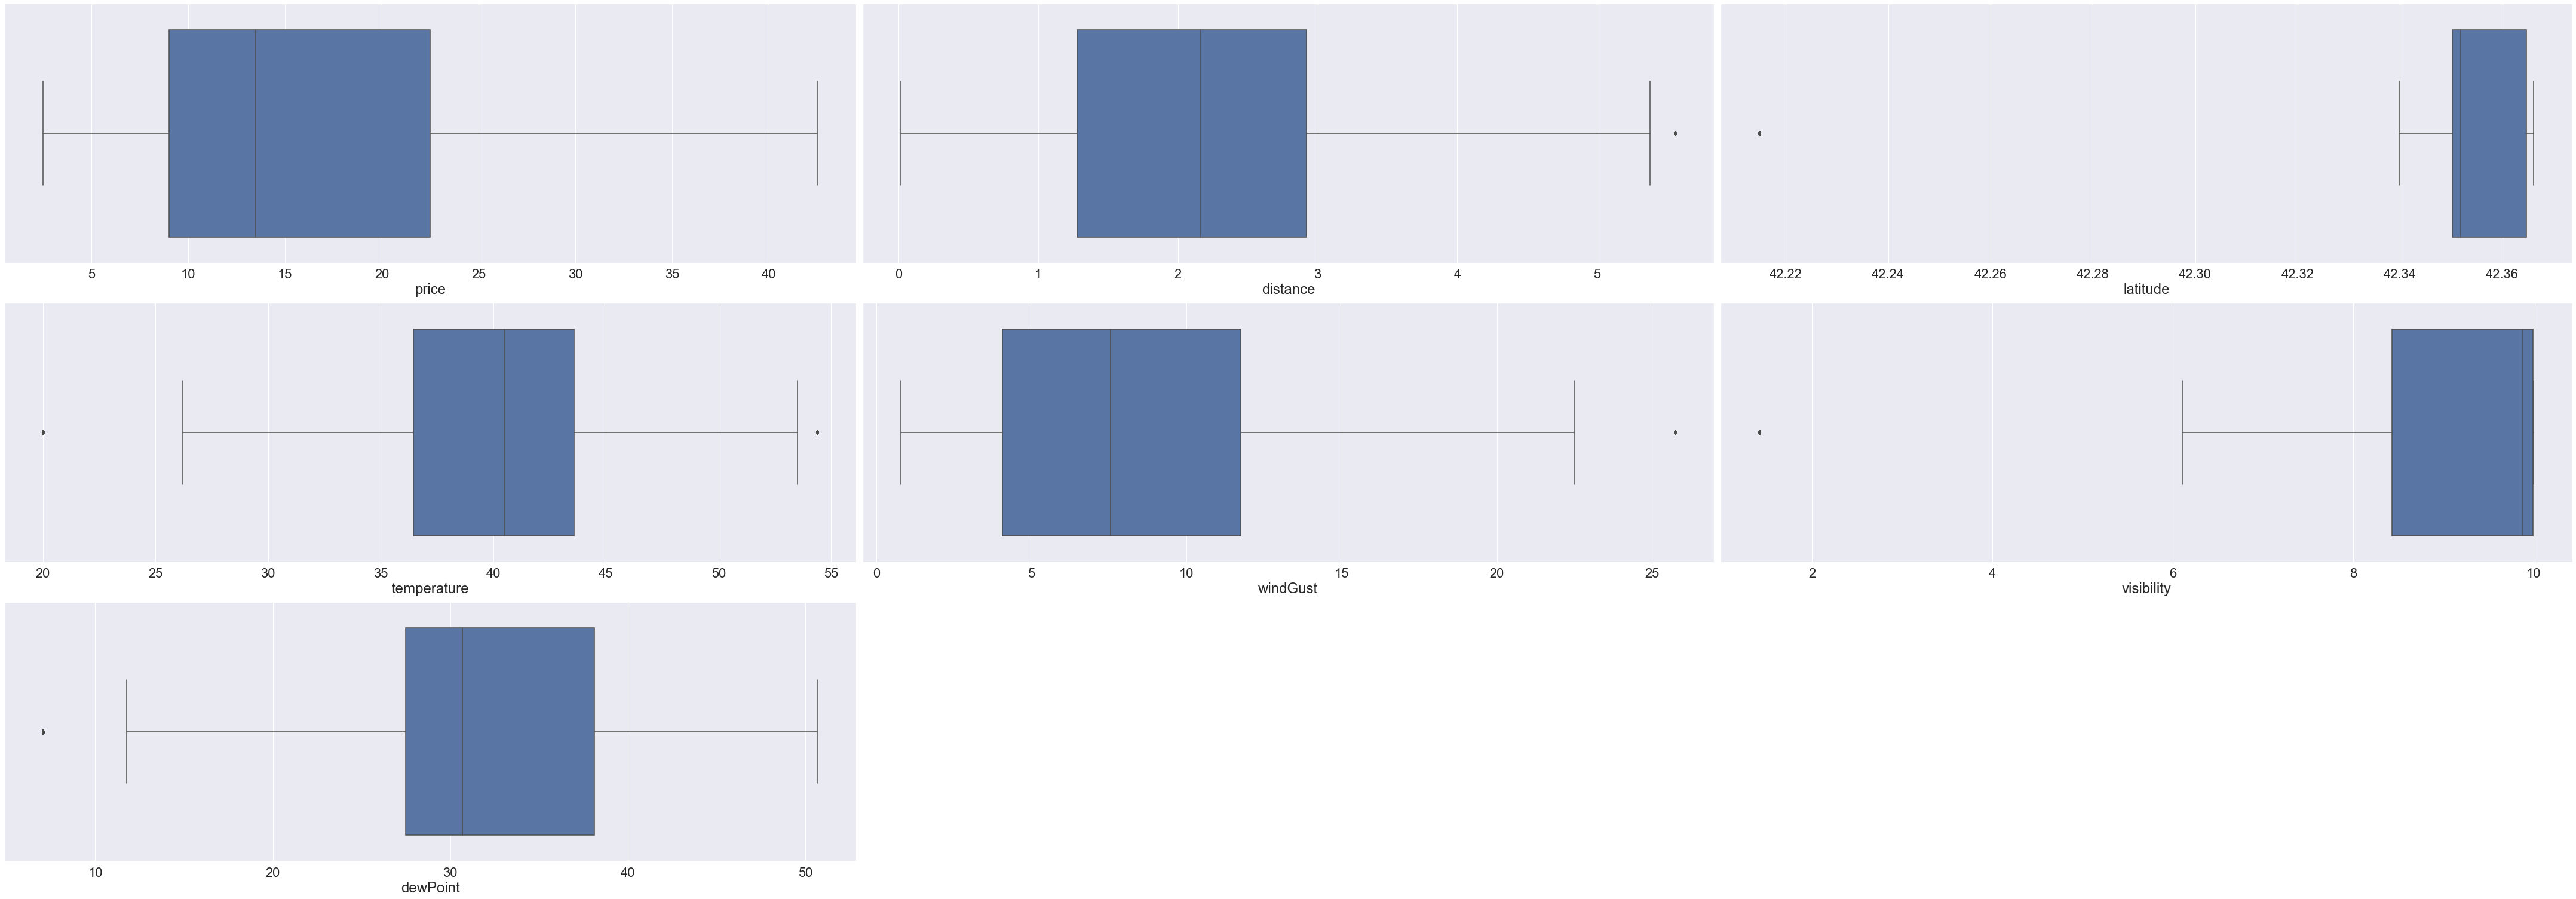

In [ ]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 10})
j=1
for column in data2:
    plt.subplot(8,3,j)
    sns.boxplot(x=data2[column])
    plt.tight_layout()
    j=j+1

In [ ]:
df2.head()

hour  day  month            source cab_type          name  price  distance  \
0     9   16     12  Haymarket Square     Lyft        Shared    5.0      0.44   
1     2   27     11  Haymarket Square     Lyft           Lux   11.0      0.44   
2     1   28     11  Haymarket Square     Lyft          Lyft    7.0      0.44   
3     4   30     11  Haymarket Square     Lyft  Lux Black XL   26.0      0.44   
4     3   29     11  Haymarket Square     Lyft       Lyft XL    9.0      0.44   

   surge_multiplier  latitude  ...  windSpeed  windGust visibility  dewPoint  \
0               1.0   42.2148  ...       8.66      9.17     10.000     32.70   
1               1.0   42.2148  ...      11.98     11.98      4.786     41.83   
2               1.0   42.2148  ...       7.33      7.33     10.000     31.10   
3               1.0   42.2148  ...       5.28      5.28     10.000     26.64   
4               1.0   42.2148  ...       9.14      9.14     10.000     28.61   

   pressure  windBearing  cloudCover  uvIndex  ozone  moonPhase  
0   1021.98           57        0.72        0  303.8       0.30  
1   1003.97           90        1.00        0  291.1       0.64  
2    992.28          240        0.03        0  315.7       0.68  
3   1013.73          310        0.00        0  291.1       0.75  
4    998.36          303        0.44        0  347.7       0.72  

[5 rows x 26 columns]

# **DATA PREPROCESSING**
---

## *1. Hapus Fitur yang Tidak Berguna*

Kita akan menghapus beberapa fitur yang tidak digunakan dengan membuat dataframe baru.

In [ ]:
# For further modelling i don't think we need date related features. But maybe we need them in the future analysis.
# so i will make new dataframe

ddf = df.drop(['id','timestamp','datetime','long_summary',
               'apparentTemperatureHighTime','apparentTemperatureLowTime',
               'apparentTemperatureLowTime','windGustTime',
               'sunriseTime','sunsetTime','uvIndexTime',
               'temperatureMinTime','temperatureMaxTime',
               'apparentTemperatureMinTime','temperatureLowTime',
               'apparentTemperatureMaxTime'],axis=1)

In [ ]:
ddf.shape

(637975, 41)

### Korelasi Fitur-Fitur Suhu dengan Harga
---

Tujuan kita saat ini membuat model linear regression. Pertama-tama, kita akan memeriksa korelasi fitur yang berkaitan dengan temperatur dan target fitur yaitu Price.

In [ ]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh',
            'temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin',
            'temperatureHighTime','temperatureMax',
            'apparentTemperatureMin','apparentTemperatureMax',
            'price']

In [ ]:
df_temp = ddf[temp_cols]
df_temp.head()

temperature  apparentTemperature  temperatureHigh  temperatureLow  \
0        42.34                37.12            43.68           34.19   
1        43.58                37.35            47.30           42.10   
2        38.33                32.93            47.55           33.10   
3        34.38                29.63            45.03           28.90   
4        37.44                30.88            42.18           36.71   

   apparentTemperatureHigh  apparentTemperatureLow  temperatureMin  \
0                    37.95                   27.39           39.89   
1                    43.92                   36.20           40.49   
2                    44.12                   29.11           35.36   
3                    38.53                   26.20           34.67   
4                    35.75                   30.29           33.10   

   temperatureHighTime  temperatureMax  apparentTemperatureMin  \
0           1544968800           43.68                   33.73   
1           1543251600           47.30                   36.20   
2           1543320000           47.55                   31.04   
3           1543510800           45.03                   30.30   
4           1543420800           42.18                   29.11   

   apparentTemperatureMax  price  
0                   38.07    5.0  
1                   43.92   11.0  
2                   44.12    7.0  
3                   38.53   26.0  
4                   35.75    9.0

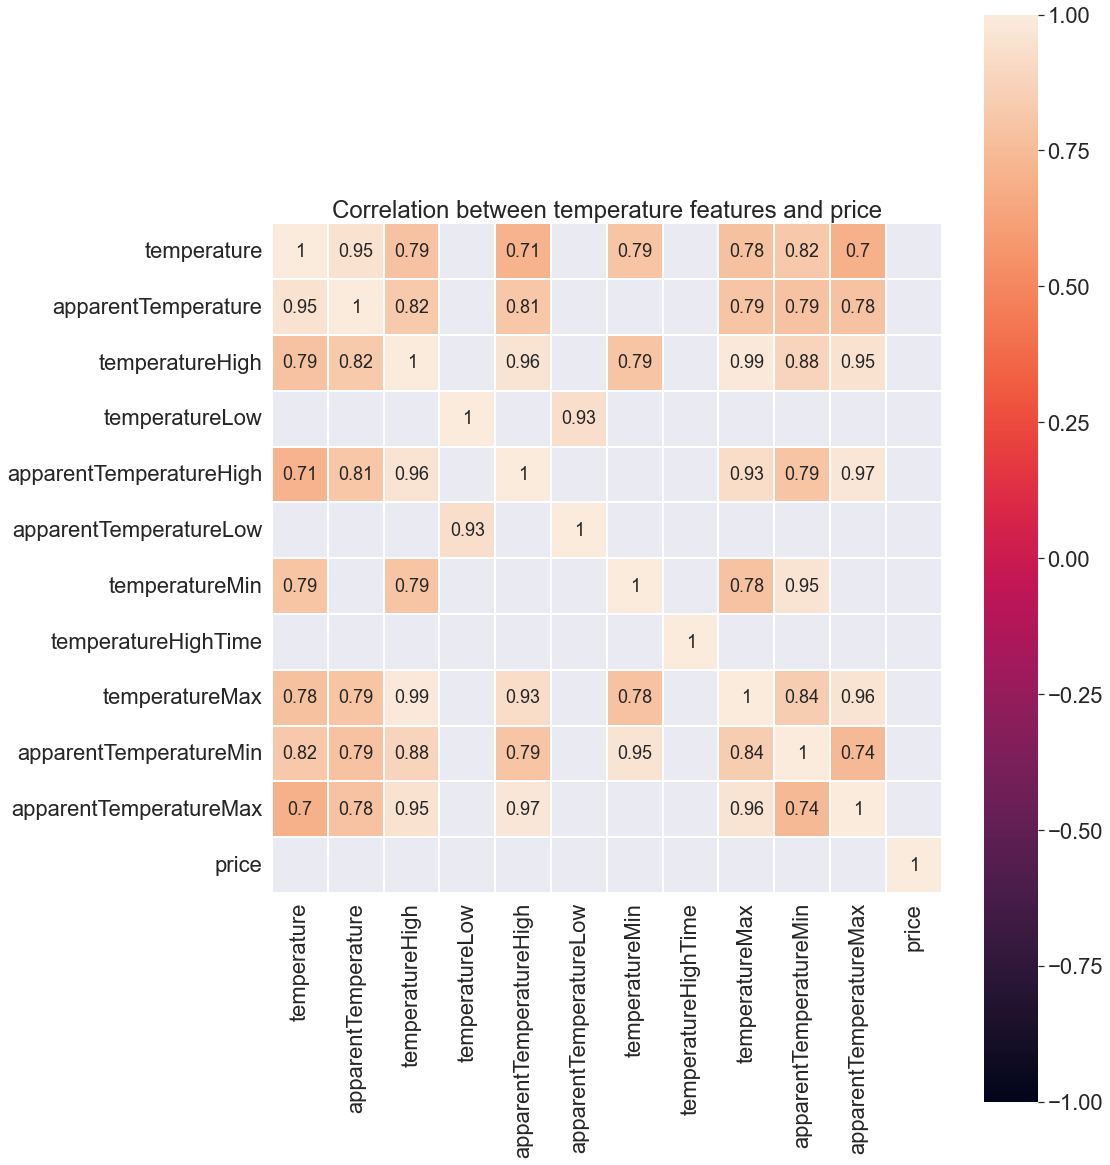

In [ ]:
corr_temp = df_temp.corr()

plt.figure(figsize=(15,20))
sns.heatmap(corr_temp[(corr_temp >= 0.7) | (corr_temp <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)

plt.title('Correlation between temperature features and price')
plt.show()

Berdasarkan heatmap diatas semua fitur yang berkaitan dengan suhu memiliki korelasi yang lemah dengan target fitur kita yaitu price.

Lalu kita akan menghapus semua yang tidak memberi dampak apapun terhadap model regresi kita.

In [ ]:
ddf = ddf.drop(['temperature','apparentTemperature','temperatureHigh',
                'temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin',
                'temperatureHighTime','temperatureMax',
                'apparentTemperatureMin','apparentTemperatureMax'],axis=1)
ddf.shape

(637975, 30)

### Korelasi Fitur-Fitur Iklim dengan Harga
---

Kedua, kita akan memeriksa korelasi fitur yang berkaitan dengan climate dan target fitur yaitu Price.

In [ ]:
climate_column = ['precipIntensity', 'precipProbability',
                  'humidity', 'windSpeed', 'windGust',
                  'visibility', 'dewPoint', 'pressure',
                  'windBearing','cloudCover', 'uvIndex', 'ozone',
                  'moonPhase','precipIntensityMax','price']
df_clim = ddf[climate_column]
df_clim.head()

precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  \
0      10.000     32.70   1021.98           57        0.72        0  303.8   
1       4.786     41.83   1003.97           90        1.00        0  291.1   
2      10.000     31.10    992.28          240        0.03        0  315.7   
3      10.000     26.64   1013.73          310        0.00        0  291.1   
4      10.000     28.61    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  price  
0       0.30              0.1276    5.0  
1       0.64              0.1300   11.0  
2       0.68              0.1064    7.0  
3       0.75              0.0000   26.0  
4       0.72              0.0001    9.0

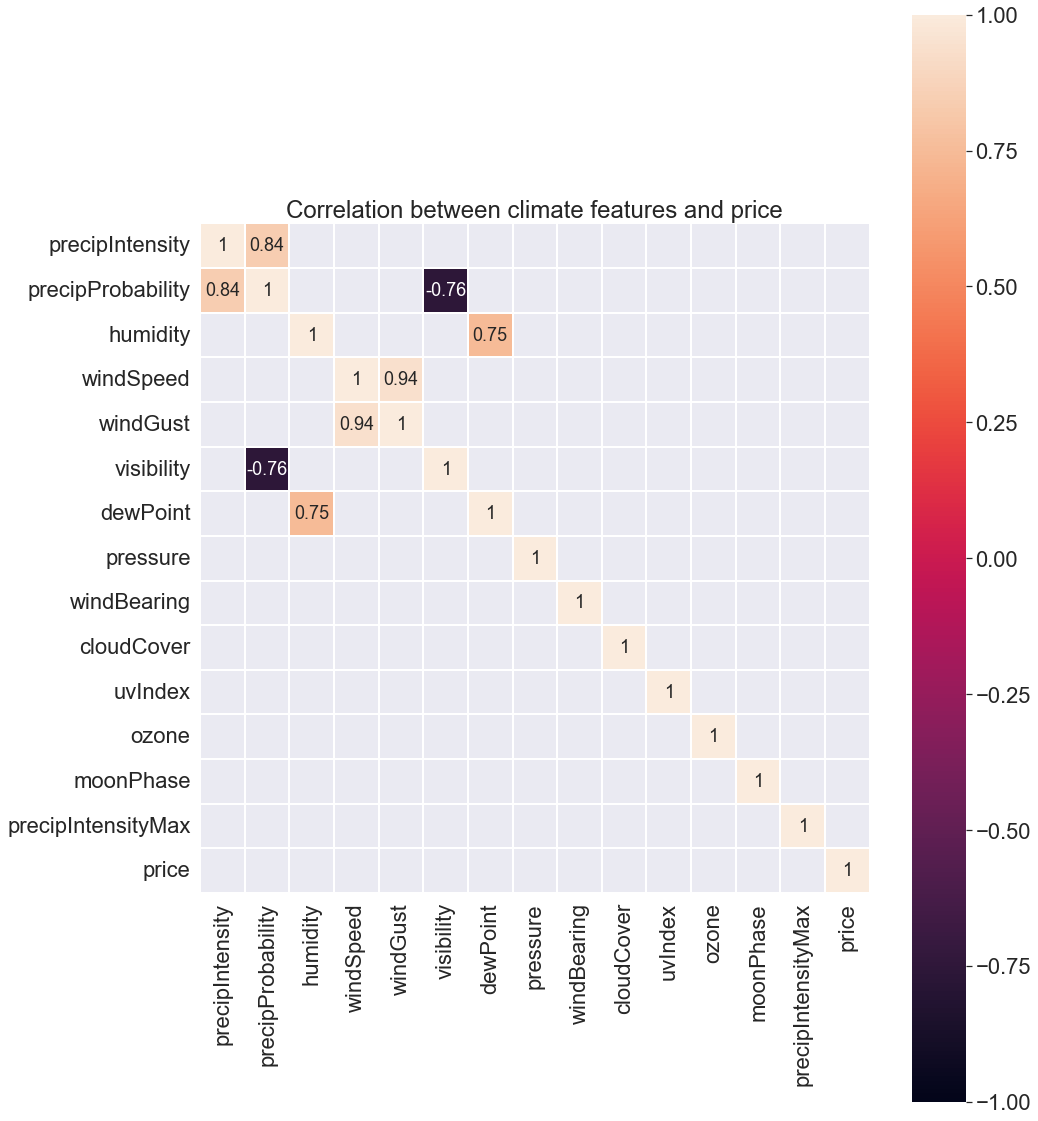

In [ ]:
corr_clim = df_clim.corr()

plt.figure(figsize=(15,20))
sns.heatmap(corr_clim[(corr_clim >= 0.7) | (corr_clim <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)

plt.title('Correlation between climate features and price')
plt.show()

Seperti sebelumnya, semua fitur yang berkaitan dengan iklim juga memiliki korelasi yang lemah dengan fitur target kita yaitu price.

Sekali lagi, kita hapus semua fitur yang tidak membuat dampak apapun terhadap model regresi kita.

In [ ]:
ddf = ddf.drop(['precipIntensity', 'precipProbability', 'humidity',
                'windSpeed','windGust', 'visibility', 'dewPoint',
                'pressure', 'windBearing','cloudCover', 'uvIndex',
                'ozone', 'moonPhase','precipIntensityMax'],axis=1)
ddf.shape

(637975, 16)

### Cek Categorical Values dalam Fitur-Fitur Dataset
---

Ketiga, kita akan memeriksa nilai categorical yang ada di dalam fitur-fitur dataset.

In [ ]:
category_col = ddf.select_dtypes(include=['object','category']).columns.tolist()
for column in ddf[category_col]:
    print(f'{column} : {ddf[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

Kita dapat melihat bahwa fitur timezone hanya memiliki 1 nilai saja dan fitur product_id berisi banyak nilai-nilai yang tidak terdefinisi.

Mari kita hapus fitur-fitur itu

In [ ]:
ddf = ddf.drop(['timezone','product_id'],axis=1)

ddf.shape

(637975, 14)

### Korelasi Fitur-Fitur Categorical dengan Harga
---

Keempat, kita akan memeriksa korelasi fitur-fitur categorical dengan target fitur yaitu Price.

In [ ]:
new_cat = ['source','destination','cab_type','name','short_summary',
           'icon','price']

df_cat = ddf[new_cat]
df_cat.head()

source    destination cab_type          name    short_summary  \
0  Haymarket Square  North Station     Lyft        Shared   Mostly Cloudy    
1  Haymarket Square  North Station     Lyft           Lux            Rain    
2  Haymarket Square  North Station     Lyft          Lyft           Clear    
3  Haymarket Square  North Station     Lyft  Lux Black XL           Clear    
4  Haymarket Square  North Station     Lyft       Lyft XL   Partly Cloudy    

                    icon  price  
0   partly-cloudy-night     5.0  
1                  rain    11.0  
2           clear-night     7.0  
3           clear-night    26.0  
4   partly-cloudy-night     9.0

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
df_cat_encode

source  destination  cab_type  name  short_summary  icon  price
0            5            7         0     7              4     5    5.0
1            5            7         0     2              8     6   11.0
2            5            7         0     5              0     1    7.0
3            5            7         0     4              0     1   26.0
4            5            7         0     6              6     5    9.0
...        ...          ...       ...   ...            ...   ...    ...
693065      11            6         1    11              6     5    9.5
693066      11            6         1    10              6     5   13.0
693067      11            6         1     9              6     5    9.5
693069      11            6         1     1              6     5   27.0
693070      11            6         1     8              6     5   10.0

[637975 rows x 7 columns]

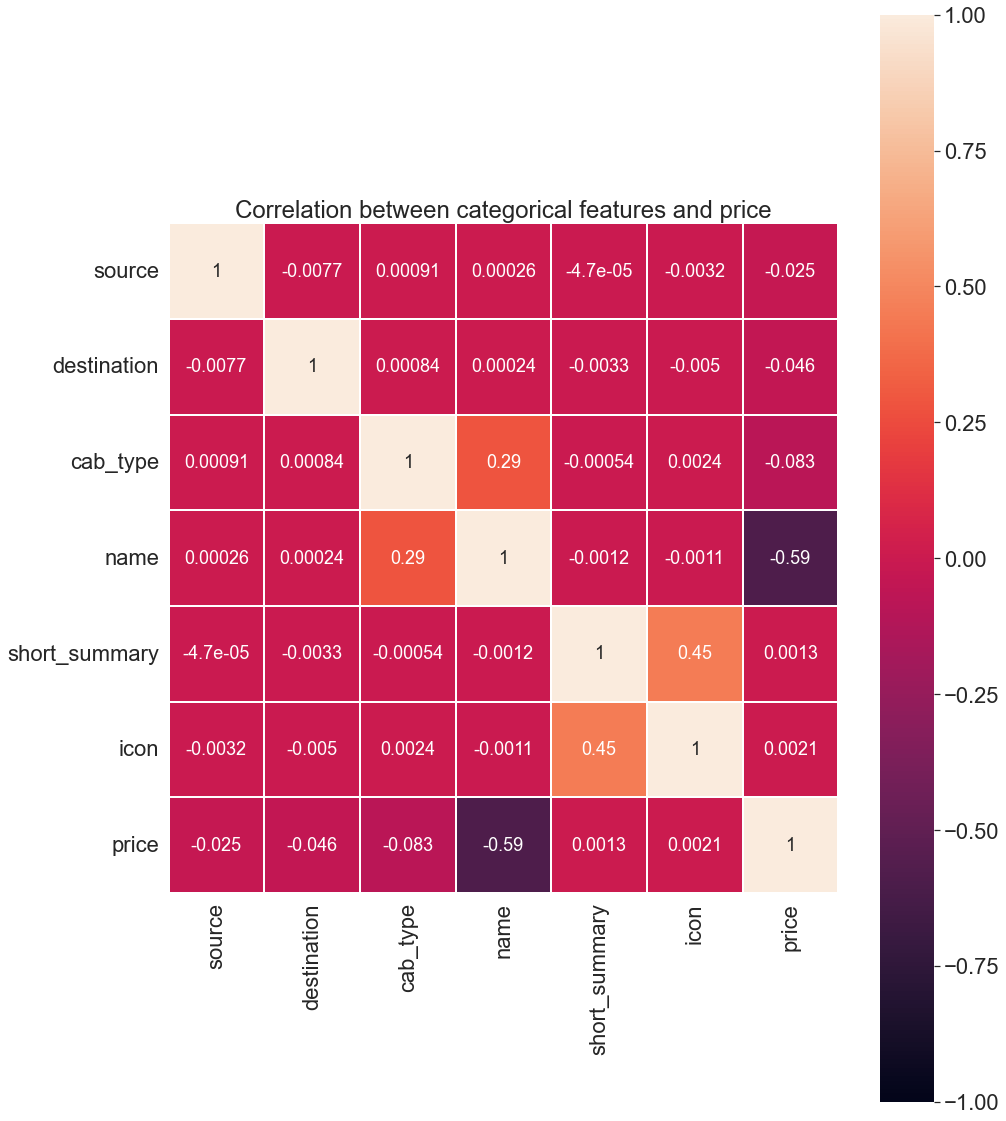

In [ ]:
corr_cat = df_cat_encode.corr()

plt.figure(figsize=(15,20))
sns.heatmap(corr_cat,
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)

plt.title('Correlation between categorical features and price')
plt.show()

Berdasarkan heatmap diatas hanya fitur name yang memiliki korelasi yang relatif kuat daripada fitur-fitur lainnya. Fitur-fitur yang memiliki korelasi yang relatif lemah yaitu source, destination, dan cab_type.

Kita akan menghapus fitur-fitur yang memiliki korelasi yang relatif lemah kecuali cab_type. Fitur cab_type memiliki korelasi yang lebih kuat daripada 2 fitur lainnya.

In [ ]:
ddf = ddf.drop(['source','destination','short_summary','icon'],axis=1)

ddf.head()

hour  day  month cab_type          name  price  distance  surge_multiplier  \
0     9   16     12     Lyft        Shared    5.0      0.44               1.0   
1     2   27     11     Lyft           Lux   11.0      0.44               1.0   
2     1   28     11     Lyft          Lyft    7.0      0.44               1.0   
3     4   30     11     Lyft  Lux Black XL   26.0      0.44               1.0   
4     3   29     11     Lyft       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  
0   42.2148    -71.033  
1   42.2148    -71.033  
2   42.2148    -71.033  
3   42.2148    -71.033  
4   42.2148    -71.033

Selain itu, kita akan menghapus beberapa fitur seperti hour, day,month, latitude, longitude karena kita tidak membutuhkan mereka untuk saat ini

In [ ]:
ddf = ddf.drop(['hour','day','month','latitude','longitude'],axis=1)

ddf.head()

cab_type          name  price  distance  surge_multiplier
0     Lyft        Shared    5.0      0.44               1.0
1     Lyft           Lux   11.0      0.44               1.0
2     Lyft          Lyft    7.0      0.44               1.0
3     Lyft  Lux Black XL   26.0      0.44               1.0
4     Lyft       Lyft XL    9.0      0.44               1.0

In [ ]:
ddf.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

## *2. Removing Outliers*

Sebelumnya kita sudah menghapus outliers pada fitur price berdasarkan harga maksimum. Sekarang kita akan memeriksa outlier lain yang kemunginan ada

Kita akan menggunakan metode Interquartil Range (IQR) untuk memeriksa batas atas dan batas bawah pencilan

In [ ]:
Q1 = ddf['price'].quantile(0.25)
Q3 = ddf['price'].quantile(0.75)
IQR = Q3-Q1

In [ ]:
# harga yang melebihi batas atas
ddf[ddf['price']>(Q3+(1.5*IQR))]

cab_type          name  price  distance  surge_multiplier
706        Lyft     Lux Black   52.5      3.25              2.00
707        Lyft  Lux Black XL   67.5      3.25              2.00
769        Lyft  Lux Black XL   45.5      4.76              1.00
1094       Lyft  Lux Black XL   45.5      4.31              1.00
1318       Lyft  Lux Black XL   45.5      5.33              1.00
...         ...           ...    ...       ...               ...
692439     Uber     Black SUV   47.0      5.56              1.00
692698     Lyft  Lux Black XL   52.5      4.58              1.25
692891     Lyft  Lux Black XL   47.5      5.42              1.00
692962     Uber     Black SUV   51.0      7.36              1.00
693007     Uber     Black SUV   49.5      7.36              1.00

[5588 rows x 5 columns]

In [ ]:
# harga yang melebihi batas bawah
ddf[ddf['price']<(Q1-(1.5*IQR))]

Empty DataFrame
Columns: [cab_type, name, price, distance, surge_multiplier]
Index: []

Dapat kita simpulkan bahwa kita memiliki 5588 data outliers. Lalu kita akan menghapusnya.

In [ ]:
print('Size before removing :',ddf.shape)
ddf= ddf[~((ddf['price']>(Q3+(1.5*IQR))))]
print('Size after removing :',ddf.shape)

Size before removing : (637975, 5)
Size after removing : (632387, 5)


## *3. Encoding Data*

transformasi data

In [ ]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [ ]:
ddf_onehot = ddf.copy()
for col in ddf_onehot.select_dtypes(include='O').columns:
    ddf_onehot=one_hot_encoder(ddf_onehot,col)
    
ddf_onehot.head()

price  distance  surge_multiplier  cab_type_Lyft  cab_type_Uber  \
0    5.0      0.44               1.0              1              0   
1   11.0      0.44               1.0              1              0   
2    7.0      0.44               1.0              1              0   
3   26.0      0.44               1.0              1              0   
4    9.0      0.44               1.0              1              0   

   name_Black  name_Black SUV  name_Lux  name_Lux Black  name_Lux Black XL  \
0           0               0         0               0                  0   
1           0               0         1               0                  0   
2           0               0         0               0                  0   
3           0               0         0               0                  1   
4           0               0         0               0                  0   

   name_Lyft  name_Lyft XL  name_Shared  name_UberPool  name_UberX  \
0          0             0            1              0           0   
1          0             0            0              0           0   
2          1             0            0              0           0   
3          0             0            0              0           0   
4          0             1            0              0           0   

   name_UberXL  name_WAV  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0

## *4. Splitting Data*

Pilih fitur yang akan digunakan sebagai input dan target prediksi.

In [ ]:
# prepare the training set and testing set

# memilih semua fitur kecuali fitur target
x = ddf_onehot.drop(['price'],axis=1)
# memilih fitur target
y = ddf_onehot['price']

In [ ]:
print('size of x = {0}'.format(x.shape))
print('size of y = {0}'.format(y.shape))
print(x.shape != y.shape)

size of x = (632387, 16)
size of y = (632387,)
True


Tahapan selanjutnya adalah melakukan pemisahan data untuk training dan testing.

Mengapa ini penting? Hal ini diperlukan agar kita bisa melihat bagaimana algoritma belajar untuk melakukan prediksi pada testing data. Kita akan membagi data menjadi 70% training dan 30% testing menggunakan fungsi train_test_split() dari sklearn.model_selection.

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

# **PENDEFINISIAN MODEL**
---

# **PELATIHAN MODEL**
---

Sebelumnya kita telah melakukan pemisahan data untuk training dan testing, langkah berikutnya yaitu melakukan melatih model

Sekarang kita akan memasukkan x dan y kita ke dalam model machine learning untuk memprediksi hasilnya, tetapi sebelum itu, kita harus mengimpor LinearRegression dari sklearn.linear_model dan membuat objek dari kelas LinearRegression.

In [ ]:
from sklearn.model_selection import cross_val_score

def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
from sklearn.linear_model import LinearRegression

# model regression
LR = LinearRegression().fit(x_train, y_train)
LR

LinearRegression()

In [ ]:
print(LR.intercept_)
print(LR.coef_)

263000651921.21432
[ 2.66632236e+00  1.36622760e+01 -1.94492284e+11 -2.68805886e+11
  5.80523370e+09  5.80523371e+09 -6.85083677e+10 -6.85083677e+10
 -6.85083677e+10 -6.85083677e+10 -6.85083677e+10 -6.85083677e+10
  5.80523369e+09  5.80523369e+09  5.80523370e+09  5.80523369e+09]


Saatnya kita membuat beberapa prediksi. Untuk melakukannya, kita akan menggunakan data pengujian kita dan melihat seberapa akurat algoritme kita memprediksi skor persentase.

Sekarang prediksi output dengan variabel x_test.

In [ ]:
# target prediction
y_pred = LR.predict(x_test)
y_pred

array([30.69070435, 37.47402954,  8.28387451, ..., 13.09759521,
        9.09390259, 15.45983887])

Sekarang mari kita uji keakuratan model kita untuk mengetahui performa model berdasarkan metrics yang kita pilih

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.9337795180194193

In [ ]:
# printing values
print('Coefficient of determinatione : ', r2)
print('Intercept :', LR.intercept_)
print('Coefficients :' , LR.coef_)

Coefficient of determinatione :  0.9337795180194193
Intercept : 263000651921.21432
Coefficients : [ 2.66632236e+00  1.36622760e+01 -1.94492284e+11 -2.68805886e+11
  5.80523370e+09  5.80523371e+09 -6.85083677e+10 -6.85083677e+10
 -6.85083677e+10 -6.85083677e+10 -6.85083677e+10 -6.85083677e+10
  5.80523369e+09  5.80523369e+09  5.80523370e+09  5.80523369e+09]
Root mean squared error :  2.2601627875890653


In [ ]:
# tingkat kesalahan model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('Root mean squared error : ', rmse)

Root mean squared error :  2.2601627875890653


## *3. Finding Best Model*

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

find_best_model_using_gridsearchcv(x,y)

model  best_score                               best_params
0  linear_regression    0.933465                       {'normalize': True}
1      decision_tree    0.964466  {'criterion': 'mse', 'splitter': 'best'}

# **PENGAMBILAN KESIMPULAN**
---